In [ ]:
# https://www.statista.com/statistics/1192394/cheese-export-volume-ireland/

In [193]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#import plotly for interactive graphs
import plotly.express as px 


# import to perform Shapiro-Wilk
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm

# import to perform Q Q plot
import statsmodels.api as sm

# import the libraries for LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Libary for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

#Plot PACF function
from statsmodels.graphics.tsaplots import plot_pacf

# Calculate Skewness 
from scipy.stats import skew


In [62]:
#Display option to see more columns. Usefull to see all the columns of Dummy variables for Machine Learning
pd.set_option('display.max_columns', 120)

#make the charts look better for displays with retina resolution 
%config InlineBackend.figure_format = 'retina'

In [63]:
#Read in milk collected annual data
df_MilkCollected_Annual = pd.read_csv('C:\\Project CA2\\Data\\milk products annual.csv')

#Read in file with Country, Alpha 2 and Alpha 3 codes
df_CountryCode = pd.read_csv('C:\\Project CA2\\Data\\ISO Codes.csv')

#Read in milk collected monthly data
df_MilkCollected_Monthly = pd.read_csv('C:\\Project CA2\\Data\\milk products monthly.csv')

### Annual Data
### Output is 4 files
### 1 file with  Raw Milk, Drinking Milk and Butter Produced Annualy for all EU countries from 1970
### 3 seperate files with country data for Ireland, Belgium and France from 1970

In [64]:
df_MilkCollected_Annual.head()

,DATAFLOW,LAST UPDATE,freq,dairyprod,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRO_MK_COLA(1.0),30/11/22 23:00:00,A,D1110D,THS_T,AL,2017,57.36,p
1,ESTAT:APRO_MK_COLA(1.0),30/11/22 23:00:00,A,D1110D,THS_T,AL,2018,64.39,NaN
2,ESTAT:APRO_MK_COLA(1.0),30/11/22 23:00:00,A,D1110D,THS_T,AL,2019,56.82,NaN
3,ESTAT:APRO_MK_COLA(1.0),30/11/22 23:00:00,A,D1110D,THS_T,AL,2020,56.27,NaN
4,ESTAT:APRO_MK_COLA(1.0),30/11/22 23:00:00,A,D1110D,THS_T,AL,2021,58.94,NaN


In [65]:
#Drop unwanted columns
#These columns have meta information that is constant or not useful 
df_MilkCollected_Annual.drop(['DATAFLOW', 'LAST UPDATE','freq','unit','OBS_FLAG'], axis=1,inplace=True)

In [66]:
df_MilkCollected_Annual.head()

,dairyprod,geo,TIME_PERIOD,OBS_VALUE
0,D1110D,AL,2017,57.36
1,D1110D,AL,2018,64.39
2,D1110D,AL,2019,56.82
3,D1110D,AL,2020,56.27
4,D1110D,AL,2021,58.94


In [67]:
#Rename colunms to something more meaningful 
df_MilkCollected_Annual = df_MilkCollected_Annual.rename(columns={'dairyprod': 'Product', 'geo': 'Geo', 'TIME_PERIOD': 'Year' ,'OBS_VALUE': 'Amount' }) 

In [68]:
#pivot into more useful format 
df_MilkCollected_Annual = df_MilkCollected_Annual.pivot_table(index = ['Year','Geo'], columns = ['Product'], values ='Amount')

In [69]:
df_MilkCollected_Annual.head()

Product     D1110D  D1200DME    D2100  D2200V  D3100_X_3113   D3113   D3200  \
Year Geo                                                                      
1968 BE    2909.55       NaN   579.00    6.80         19.13  121.08   36.36   
     DE   18318.09       NaN  3138.00  185.56         27.84  409.00  443.02   
     DK    4767.03       NaN      NaN   32.44           NaN     NaN     NaN   
     FR   19245.86       NaN  2370.18   44.14         52.19  692.48  190.71   
     IE        NaN       NaN      NaN     NaN           NaN     NaN     NaN   

Product   D4100   D6000   D7121  
Year Geo                         
1968 BE     NaN   76.21   31.81  
     DE     NaN  523.58  438.48  
     DK     NaN  159.55  105.50  
     FR     NaN  500.50  649.87  
     IE     NaN   73.25     NaN

In [70]:
#Delete years 1968 and 1970 as there is no data for Ireland for those years
df_MilkCollected_Annual = df_MilkCollected_Annual.drop([1968, 1969])

In [71]:
#Reset the index
df_MilkCollected_Annual = df_MilkCollected_Annual.reset_index( )

In [72]:
#Merge country codes with the milk collected dataframe
#Now the milk collected dataframe has ISO 3 country code for choropleth and country name
df_MilkCollected_Annual = pd.merge(df_CountryCode,df_MilkCollected_Annual,on='Geo')

In [73]:
#Drop unwanted columns
#Dropping columns that are NOT Milk Deliveries, Drinking Milk, Cream and Butter produced
df_MilkCollected_Annual.drop(['D1200DME','D3100_X_3113','D3113','D3200','D4100','D7121'], axis=1,inplace=True)

In [74]:
#Rename product columns to something more meaningful 
df_MilkCollected_Annual = df_MilkCollected_Annual.rename(columns={'D1110D': 'Raw Milk Deliveries', 'D2100': 'Milk', 'D2200V': 'Cream' ,'D6000': 'Butter' }) 

In [75]:
df_MilkCollected_Annual_Ireland = df_MilkCollected_Annual.query("Country=='Ireland'")
df_MilkCollected_Annual_Belgium = df_MilkCollected_Annual.query("Country=='Belgium'")
df_MilkCollected_Annual_France = df_MilkCollected_Annual.query("Country=='France'")

In [76]:
df_MilkCollected_Annual_Ireland.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
dtype: int64

In [77]:
df_MilkCollected_Annual_Belgium.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
dtype: int64

In [78]:
df_MilkCollected_Annual_France.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
dtype: int64

In [79]:
df_MilkCollected_Annual.head()

,Country,Geo,Code,Year,Raw Milk Deliveries,Milk,Cream,Butter
0,Albania,AL,ALB,2017,57.36,8.93,0.21,1.65
1,Albania,AL,ALB,2018,64.39,13.47,0.46,2.63
2,Albania,AL,ALB,2019,56.82,10.15,0.23,0.42
3,Albania,AL,ALB,2020,56.27,14.48,0.29,0.51
4,Albania,AL,ALB,2021,58.94,12.19,0.29,0.63


### Monthly Data
### Output is 2 files 
### 1. Irish Monthly data from 1970 for Raw Milk, Drinking Milk and Butter Produced 
### 2. Belgium Monthly data from 1970 for Raw Milk, Drinking Milk and Butter Produced 
### Will be input to machine learning

In [80]:
df_MilkCollected_Monthly.head()

,DATAFLOW,LAST UPDATE,freq,dairyprod,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRO_MK_COLM(1.0),02/12/22 23:00:00,M,D1110D,PC_FAT,AL,2015-01,0.0,NaN
1,ESTAT:APRO_MK_COLM(1.0),02/12/22 23:00:00,M,D1110D,PC_FAT,AL,2015-02,0.0,NaN
2,ESTAT:APRO_MK_COLM(1.0),02/12/22 23:00:00,M,D1110D,PC_FAT,AL,2015-03,0.0,NaN
3,ESTAT:APRO_MK_COLM(1.0),02/12/22 23:00:00,M,D1110D,PC_FAT,AL,2015-04,0.0,NaN
4,ESTAT:APRO_MK_COLM(1.0),02/12/22 23:00:00,M,D1110D,PC_FAT,AL,2015-05,0.0,NaN


In [81]:
#unit column can have 3 values per thousand tons, fat content and protein content
#only column I am interested in is per thousand tons (THS_T)
df_MilkCollected_Monthly = df_MilkCollected_Monthly.query("unit=='THS_T'")

In [82]:
#Drop unwanted columns
#These columns have meta information that is constant or not useful 
df_MilkCollected_Monthly.drop(['DATAFLOW', 'LAST UPDATE','freq','OBS_FLAG','unit'], axis=1,inplace=True)

In [83]:
df_MilkCollected_Monthly.head()

,dairyprod,geo,TIME_PERIOD,OBS_VALUE
26134,D1110D,AL,2015-01,0.0
26135,D1110D,AL,2015-02,0.0
26136,D1110D,AL,2015-03,0.0
26137,D1110D,AL,2015-04,0.0
26138,D1110D,AL,2015-05,0.0


In [84]:
#Rename colunms to something more meaningful 
df_MilkCollected_Monthly = df_MilkCollected_Monthly.rename(columns={'dairyprod': 'Product', 'geo': 'Geo', 'TIME_PERIOD': 'Year' ,'OBS_VALUE': 'Amount' }) 

In [85]:
#pivot into more useful format 
df_MilkCollected_Monthly  = df_MilkCollected_Monthly.pivot_table(index = ['Year','Geo'], columns = ['Product'], values ='Amount')


In [86]:
df_MilkCollected_Monthly.head()

Product       D1110D  D1200DME   D2100  D2200V  D3100_X_3113  D3113  D3200  \
Year    Geo                                                                  
1968-01 BE    158.26       NaN   49.00    0.44          1.06   3.82   3.19   
        DE   1379.20       NaN  251.00   11.24          1.71  28.13  37.64   
        DK    341.96       NaN     NaN    2.58           NaN    NaN    NaN   
        FR   1268.60       NaN  221.36    3.01          3.19  39.92  12.41   
        IE       NaN       NaN     NaN     NaN           NaN    NaN    NaN   

Product      D4100  D6000  D7121  
Year    Geo                       
1968-01 BE     NaN   3.26   2.91  
        DE     NaN  41.09  33.96  
        DK     NaN  11.38   8.78  
        FR     NaN  30.97  48.23  
        IE     NaN   1.16    NaN

In [87]:
#Reset the index
df_MilkCollected_Monthly = df_MilkCollected_Monthly.reset_index( )

In [88]:
#Merge country codes with the milk collected dataframe
#Now the milk collected dataframe has ISO 3 country code for choropleth and country name
df_MilkCollected_Monthly = pd.merge(df_CountryCode,df_MilkCollected_Monthly,on='Geo')

In [89]:
df_MilkCollected_Monthly.head()

,Country,Geo,Code,Year,D1110D,D1200DME,D2100,D2200V,D3100_X_3113,D3113,D3200,D4100,D6000,D7121
0,Albania,AL,ALB,2015-01,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,Albania,AL,ALB,2015-02,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,Albania,AL,ALB,2015-03,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,Albania,AL,ALB,2015-04,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,Albania,AL,ALB,2015-05,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [90]:
#Date conversion section

#Convert Year column to a datetime objest
df_MilkCollected_Monthly['Year'] = pd.to_datetime(df_MilkCollected_Monthly['Year'])

#Add a month value to the dataframe
df_MilkCollected_Monthly['Month'] = df_MilkCollected_Monthly['Year'].dt.month

#Add a month value to the dataframe
df_MilkCollected_Monthly['Year Month'] = df_MilkCollected_Monthly['Year']

#Add a vear value to the dataframe (Was in format yyyy-mm)
df_MilkCollected_Monthly['Year'] = df_MilkCollected_Monthly['Year'].dt.year


In [91]:
df_MilkCollected_Monthly.head()

,Country,Geo,Code,Year,D1110D,D1200DME,D2100,D2200V,D3100_X_3113,D3113,D3200,D4100,D6000,D7121,Month,Year Month
0,Albania,AL,ALB,2015,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1,2015-01-01
1,Albania,AL,ALB,2015,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2,2015-02-01
2,Albania,AL,ALB,2015,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3,2015-03-01
3,Albania,AL,ALB,2015,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4,2015-04-01
4,Albania,AL,ALB,2015,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,5,2015-05-01


In [92]:
df_MilkCollected_Monthly.head()

,Country,Geo,Code,Year,D1110D,D1200DME,D2100,D2200V,D3100_X_3113,D3113,D3200,D4100,D6000,D7121,Month,Year Month
0,Albania,AL,ALB,2015,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1,2015-01-01
1,Albania,AL,ALB,2015,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2,2015-02-01
2,Albania,AL,ALB,2015,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3,2015-03-01
3,Albania,AL,ALB,2015,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4,2015-04-01
4,Albania,AL,ALB,2015,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,5,2015-05-01


In [93]:
#Drop unwanted columns
#Dropping columns that are NOT Milk Deliveries, Drinking Milk, Cream and Butter produced
df_MilkCollected_Monthly.drop(['D1200DME','D3100_X_3113','D3113','D3200','D4100','D7121'], axis=1,inplace=True)

In [94]:
#Rename product columns to something more meaningful 
df_MilkCollected_Monthly = df_MilkCollected_Monthly.rename(columns={'D1110D': 'Raw Milk Deliveries', 'D2100': 'Milk', 'D2200V': 'Cream' ,'D6000': 'Butter' }) 

In [95]:
df_MilkCollected_Monthly.head()

,Country,Geo,Code,Year,Raw Milk Deliveries,Milk,Cream,Butter,Month,Year Month
0,Albania,AL,ALB,2015,0.0,0.0,0.0,NaN,1,2015-01-01
1,Albania,AL,ALB,2015,0.0,0.0,0.0,NaN,2,2015-02-01
2,Albania,AL,ALB,2015,0.0,0.0,0.0,NaN,3,2015-03-01
3,Albania,AL,ALB,2015,0.0,0.0,0.0,NaN,4,2015-04-01
4,Albania,AL,ALB,2015,0.0,0.0,0.0,NaN,5,2015-05-01


In [96]:
df_MilkCollected_Monthly_Ireland = df_MilkCollected_Monthly.query("Country=='Ireland'")
df_MilkCollected_Monthly_Ireland = df_MilkCollected_Monthly_Ireland.query("Year > 1969")

df_MilkCollected_Monthly_Belgium = df_MilkCollected_Monthly.query("Country=='Belgium'")
df_MilkCollected_Monthly_Belgium = df_MilkCollected_Monthly_Belgium.query("Year > 1969")

In [97]:
df_MilkCollected_Monthly_Ireland.head()

,Country,Geo,Code,Year,Raw Milk Deliveries,Milk,Cream,Butter,Month,Year Month
5251,Ireland,IE,IRL,1970,63.74,33.86,0.21,1.01,1,1970-01-01
5252,Ireland,IE,IRL,1970,76.61,31.77,0.24,1.29,2,1970-02-01
5253,Ireland,IE,IRL,1970,149.14,34.43,0.32,3.04,3,1970-03-01
5254,Ireland,IE,IRL,1970,232.22,33.74,0.32,5.28,4,1970-04-01
5255,Ireland,IE,IRL,1970,366.30,35.30,0.41,10.03,5,1970-05-01


In [121]:
df_MilkCollected_Monthly_Belgium.head()

,Country,Geo,Code,Year,Raw Milk Deliveries,Milk,Cream,Butter,Month,Year Month
438,Belgium,BE,BEL,1970,146.60,49.0,0.51,3.26,1,1970-01-01
439,Belgium,BE,BEL,1970,148.24,46.0,0.54,3.17,2,1970-02-01
440,Belgium,BE,BEL,1970,201.78,50.0,0.66,4.64,3,1970-03-01
441,Belgium,BE,BEL,1970,221.69,52.0,0.70,5.51,4,1970-04-01
442,Belgium,BE,BEL,1970,293.80,48.0,0.80,7.90,5,1970-05-01


### Basic data prep finished

### Begin data exploration and charting

In [99]:
#Check for Null values in Ireland monthly dataset 
df_MilkCollected_Monthly_Ireland.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
Month                  0
Year Month             0
dtype: int64

In [122]:
#Check for Null values in Brlgium monthly dataset 
df_MilkCollected_Monthly_Belgium.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
Month                  0
Year Month             0
dtype: int64

In [100]:
#Check for duplicate Rows in df_MilkCollected_Annual
df_MilkCollected_Annual[df_MilkCollected_Annual.duplicated()] 

,Country,Geo,Code,Year,Raw Milk Deliveries,Milk,Cream,Butter


In [101]:
#Check for duplicate Rows in df_MilkCollected_Monthly for Ireland
df_MilkCollected_Monthly_Ireland[df_MilkCollected_Monthly_Ireland.duplicated()] 

,Country,Geo,Code,Year,Raw Milk Deliveries,Milk,Cream,Butter,Month,Year Month


In [123]:
#Check for duplicate Rows in df_MilkCollected_Monthly for Belgium
df_MilkCollected_Monthly_Belgium[df_MilkCollected_Monthly_Belgium.duplicated()] 

,Country,Geo,Code,Year,Raw Milk Deliveries,Milk,Cream,Butter,Month,Year Month


In [149]:
#Chart showing EU butter production for 1970 to 2021

#x = df_MilkCollected_Annual.query("Year==2019")
df_map = df_MilkCollected_Annual
df_map.sort_values(by=["Year"],inplace=True) 


fig = px.choropleth(df_map, 
 locations="Code", # colunm containing ISO 3166 country codes 
 color="Butter",                 
 hover_name="Country", # column to display in hover information 
 animation_frame="Year", # column on which to animate                  
 color_continuous_scale=px.colors.sequential.YlGnBu) 

fig.update_layout( 
 # add a title text for the plot 
 title_text = 'Butter Produced - 2019 in Thousand Tons', 
 geo_scope = 'europe' # can be set to north america | south america | africa | asia | europe | usa 
) 

fig.show() 



<AxesSubplot:xlabel='Raw Milk Deliveries'>

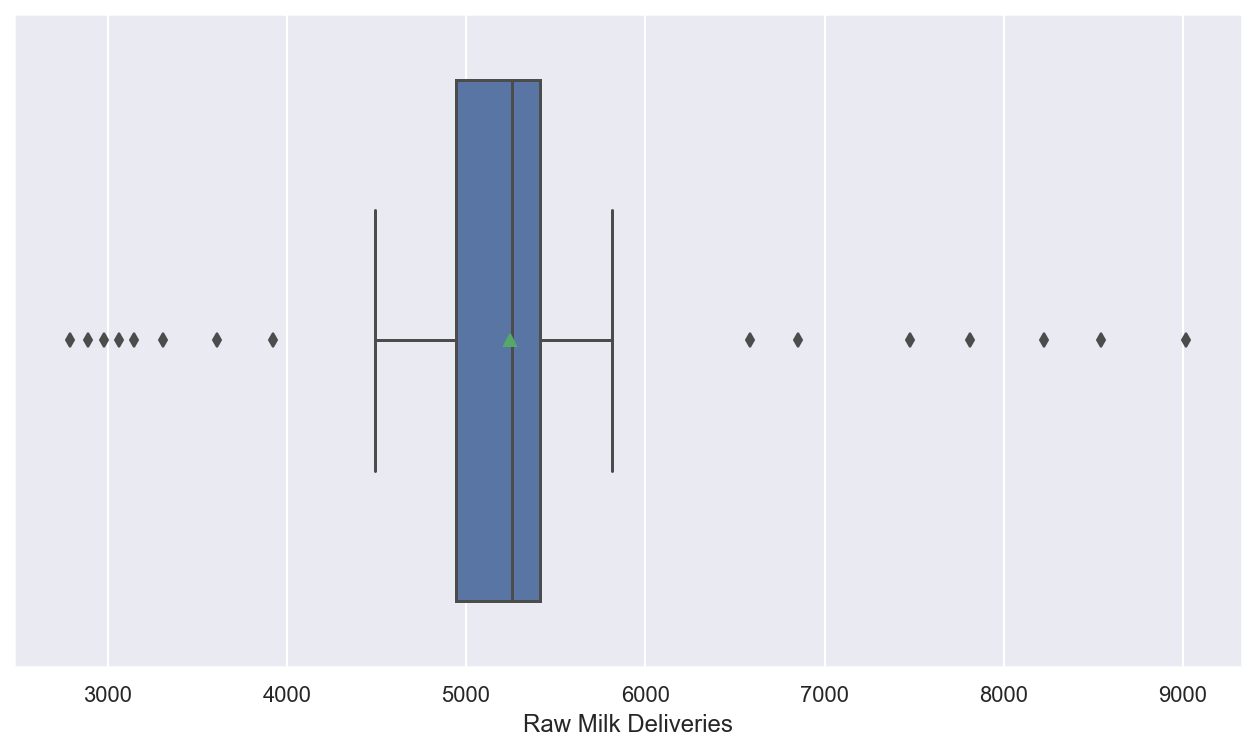

In [103]:
#Boxplot Raw Milk Deliveries Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'],showmeans=True) 

<AxesSubplot:xlabel='Milk'>

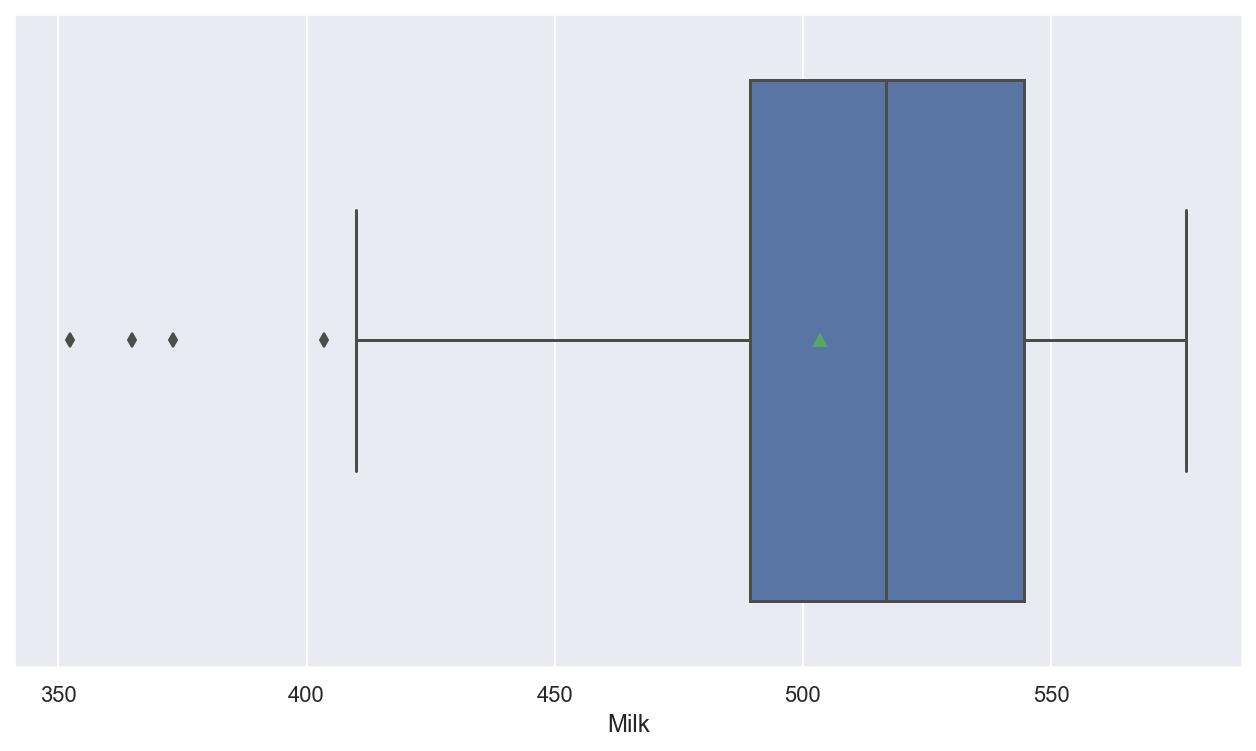

In [104]:
#Boxplot Milk  produced Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Milk'],showmeans=True) 

<AxesSubplot:xlabel='Cream'>

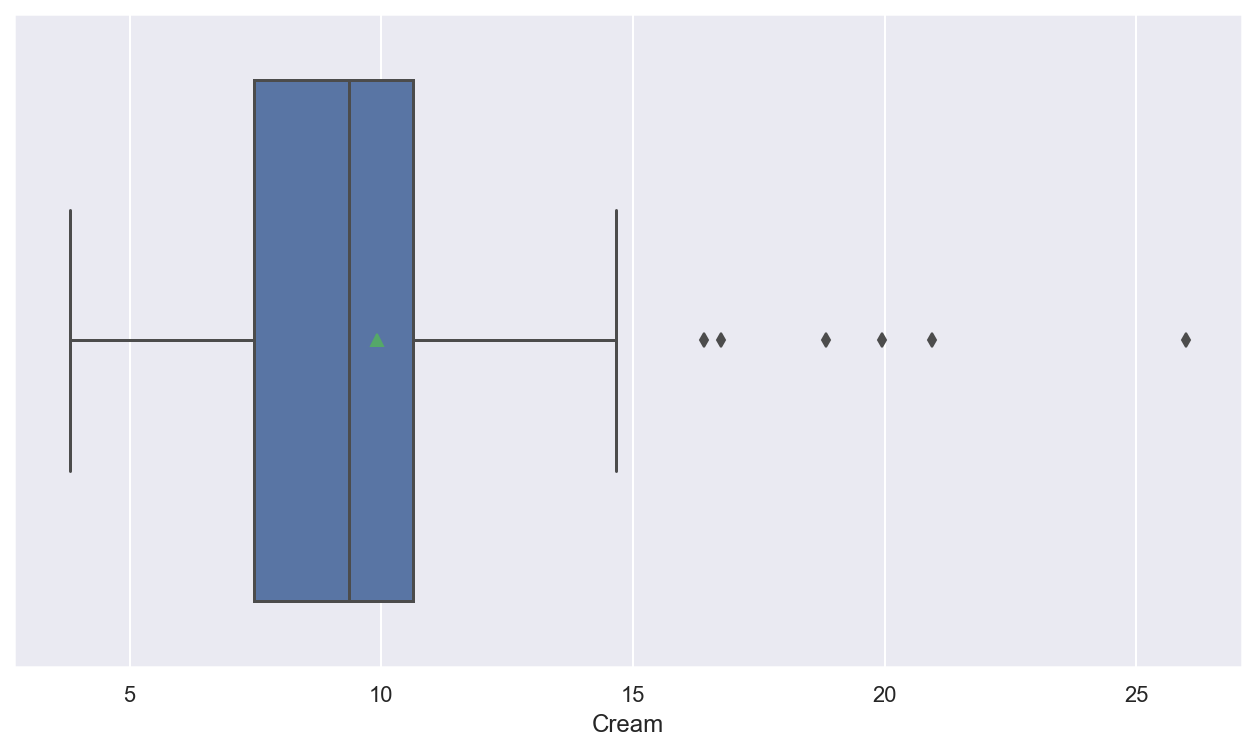

In [105]:
#Boxplot Cream produced Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Cream'],showmeans=True) 

<AxesSubplot:xlabel='Butter'>

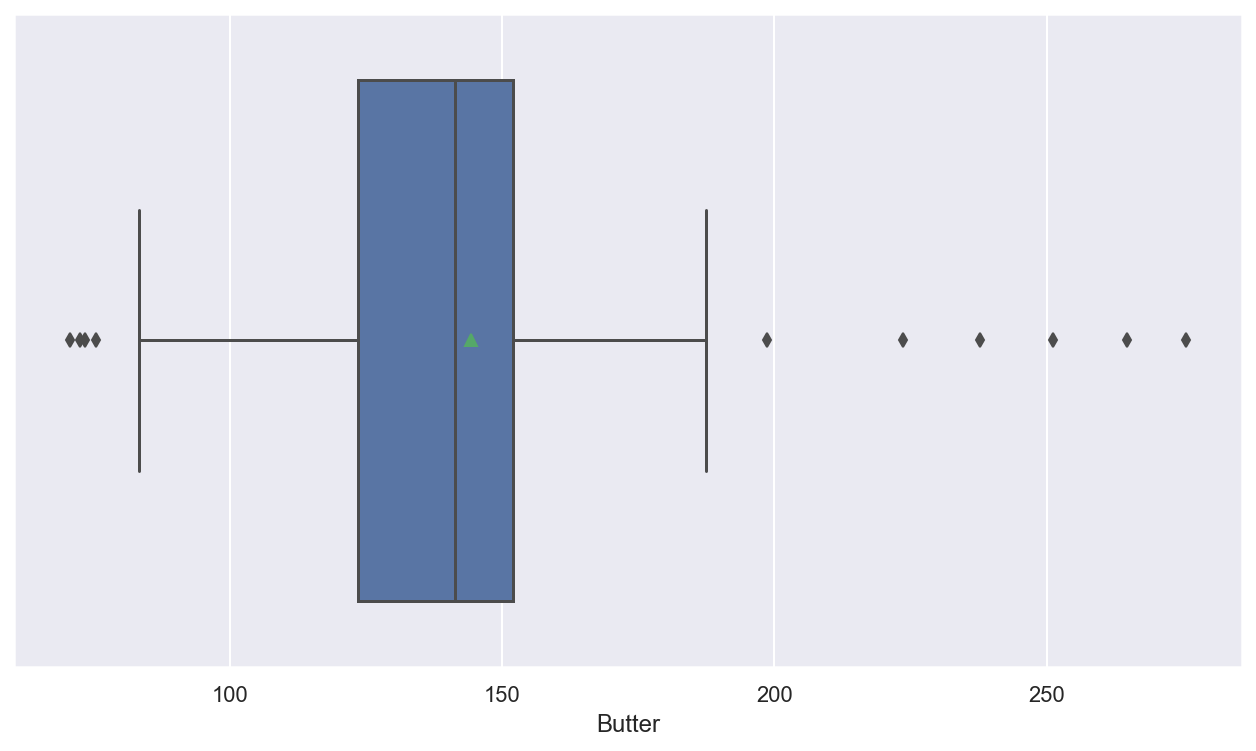

In [106]:
#Boxplot Butter produced Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Butter'],showmeans=True) 

,Year,Raw Milk Deliveries,Milk,Cream,Butter
Year,1.000000,0.818833,0.703861,0.847289,0.787330
Raw Milk Deliveries,0.818833,1.000000,0.681050,0.911173,0.987283
Milk,0.703861,0.681050,1.000000,0.532384,0.639956
Cream,0.847289,0.911173,0.532384,1.000000,0.914487
Butter,0.787330,0.987283,0.639956,0.914487,1.000000


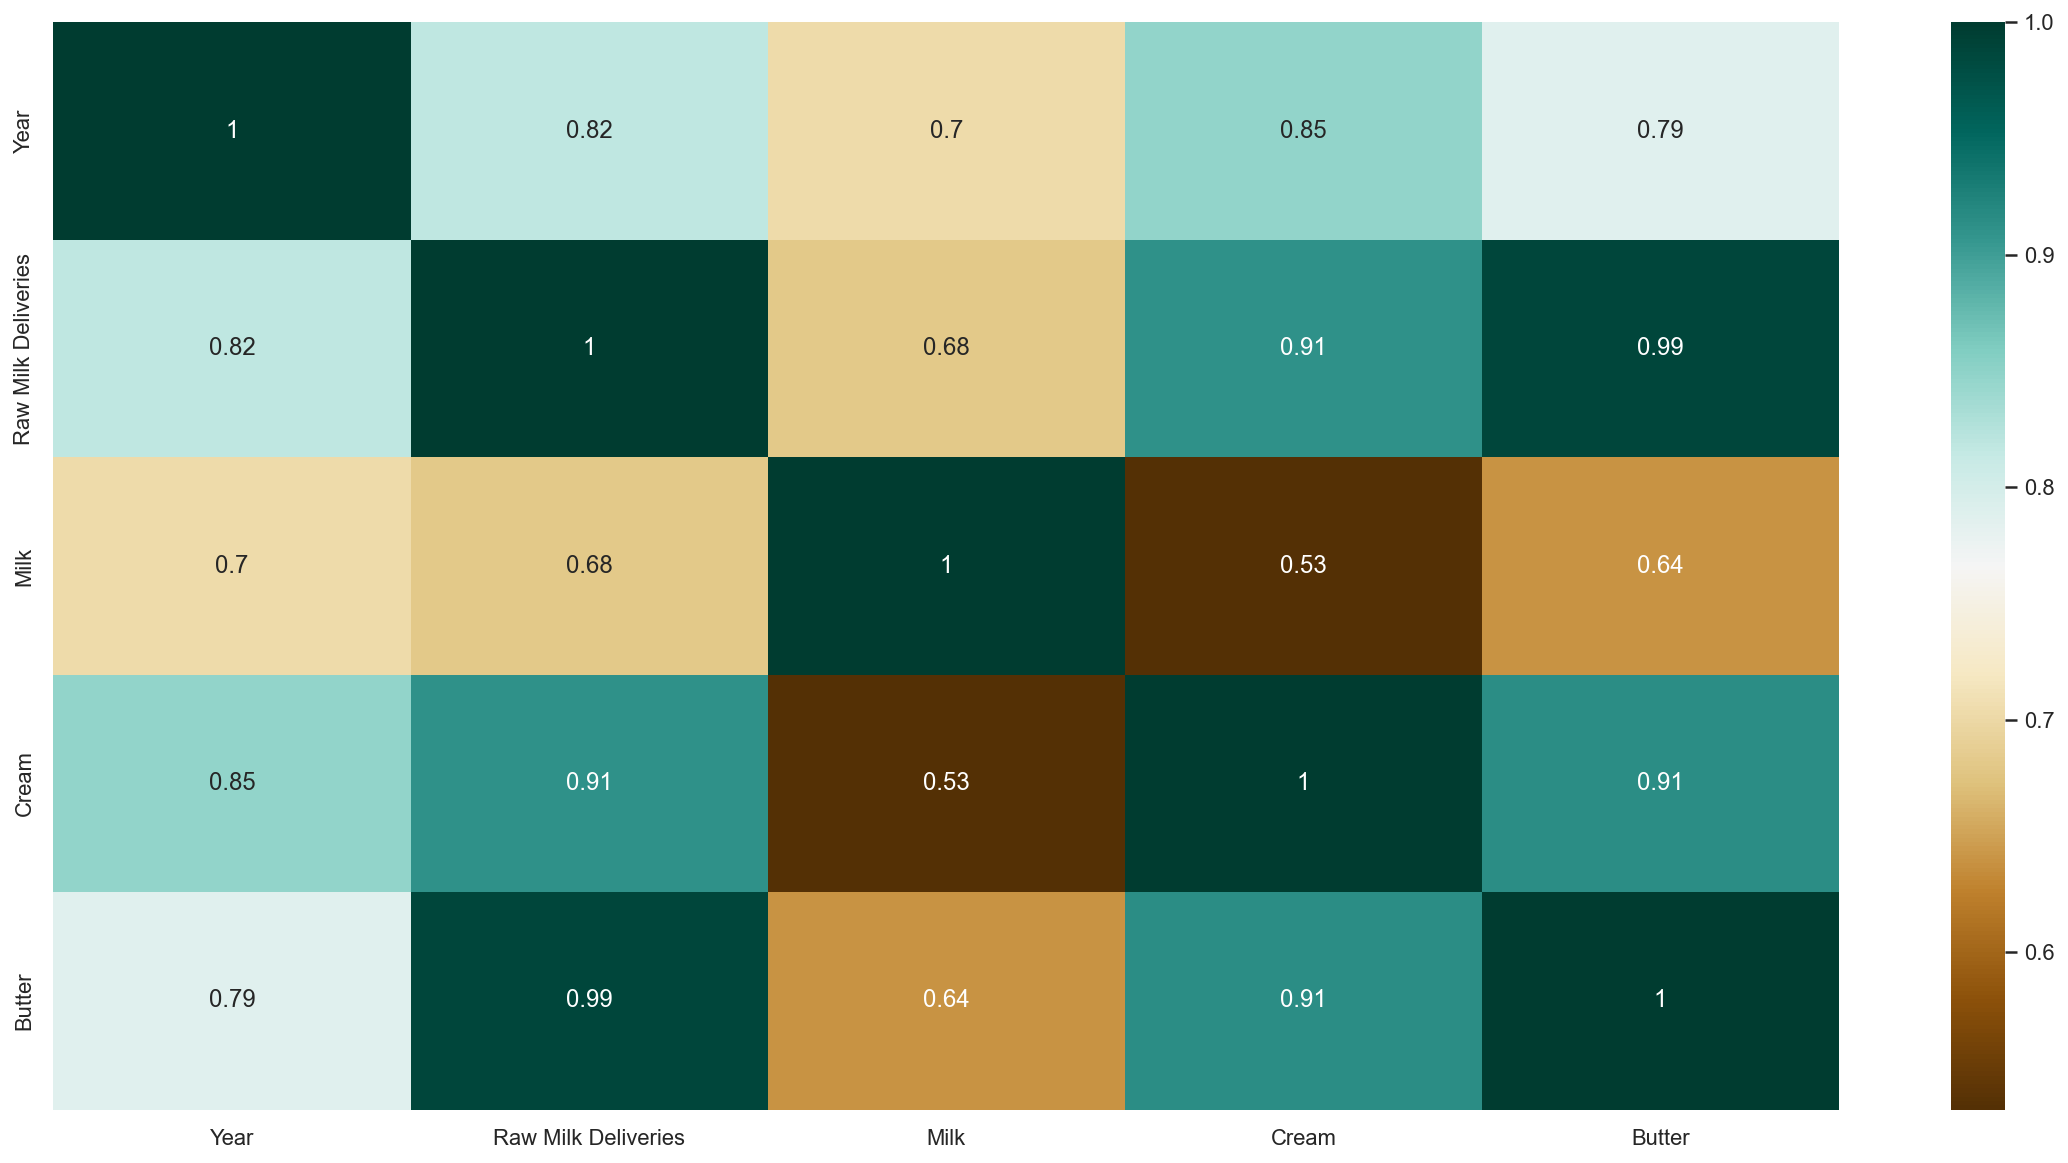

In [107]:
#Create heatmap for Irish Annual data
plt.figure(figsize=(20,10))
c= df_MilkCollected_Annual_Ireland.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c 

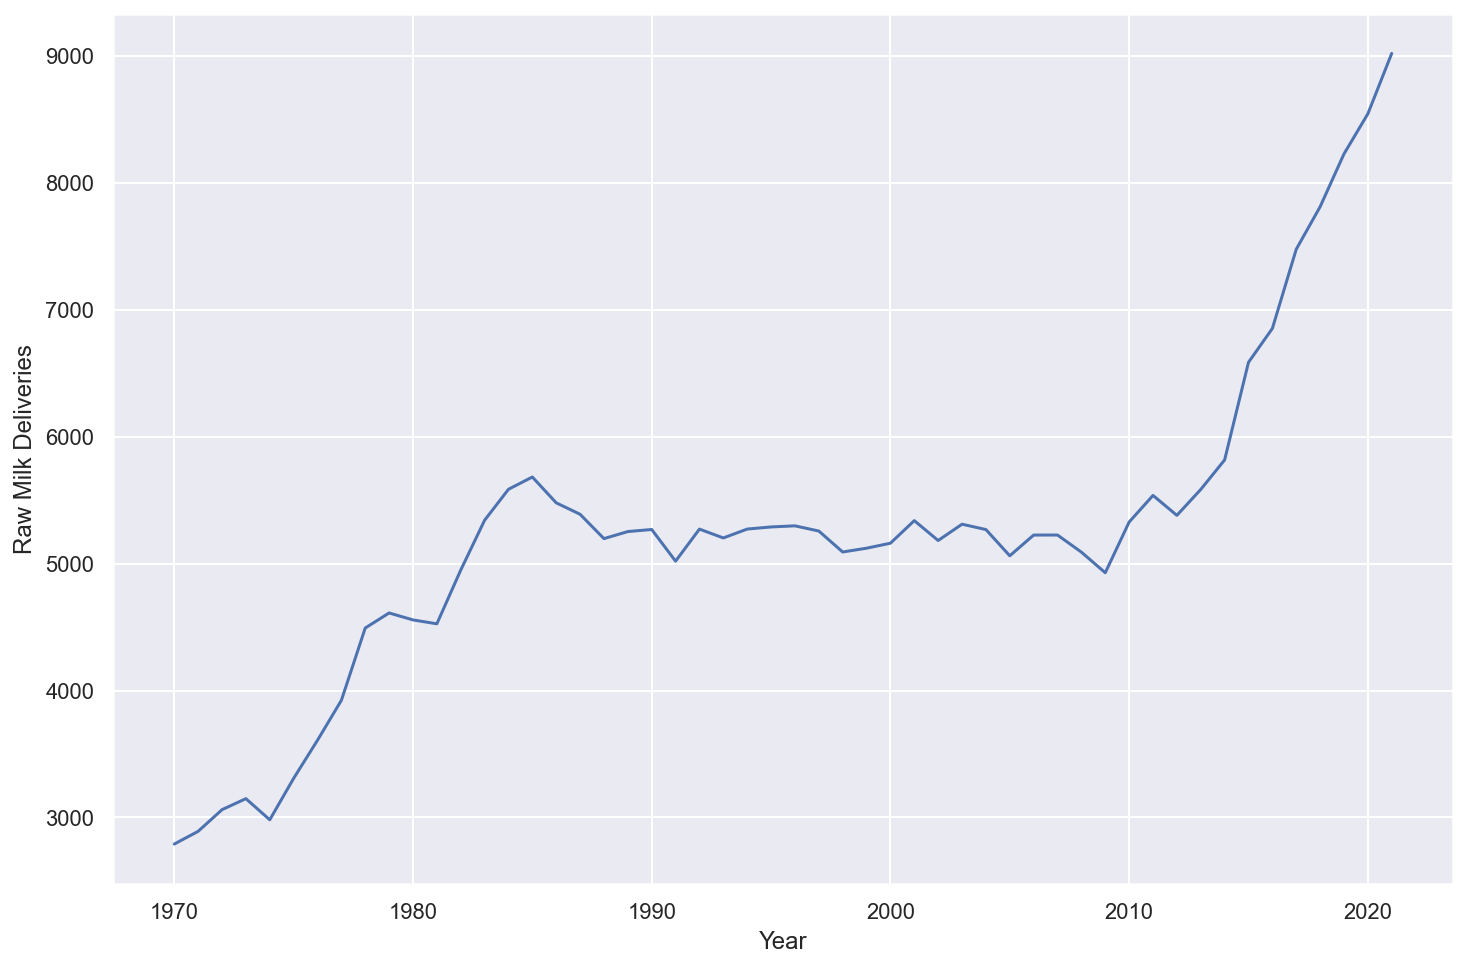

In [108]:
#Graph of Yearly Raw Milk Collected for Ireland

sns.set(rc = {'figure.figsize':(12,8)})
sns.set(font_scale=1)
myfig = sns.lineplot(x = 'Year', y = 'Raw Milk Deliveries', data = df_MilkCollected_Annual_Ireland)
plt.show()

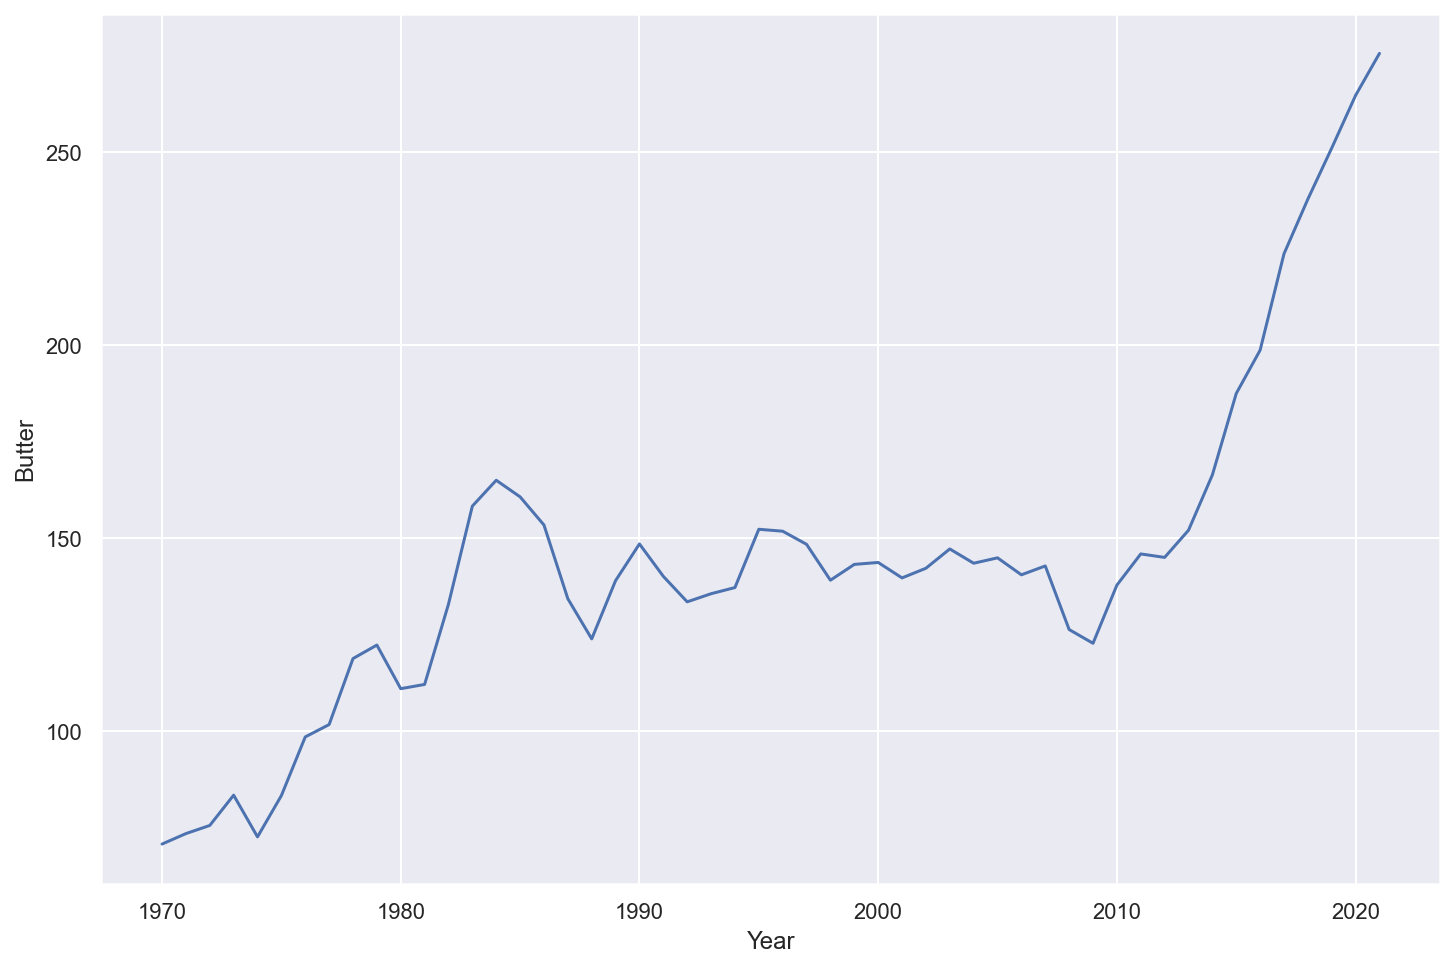

In [109]:
#Graph of Yearly Butter produced Ireland

sns.set(rc = {'figure.figsize':(12,8)})
sns.set(font_scale=1)
myfig = sns.lineplot(x = 'Year', y = 'Butter', data = df_MilkCollected_Annual_Ireland)
plt.show()

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Thousand Tons')]

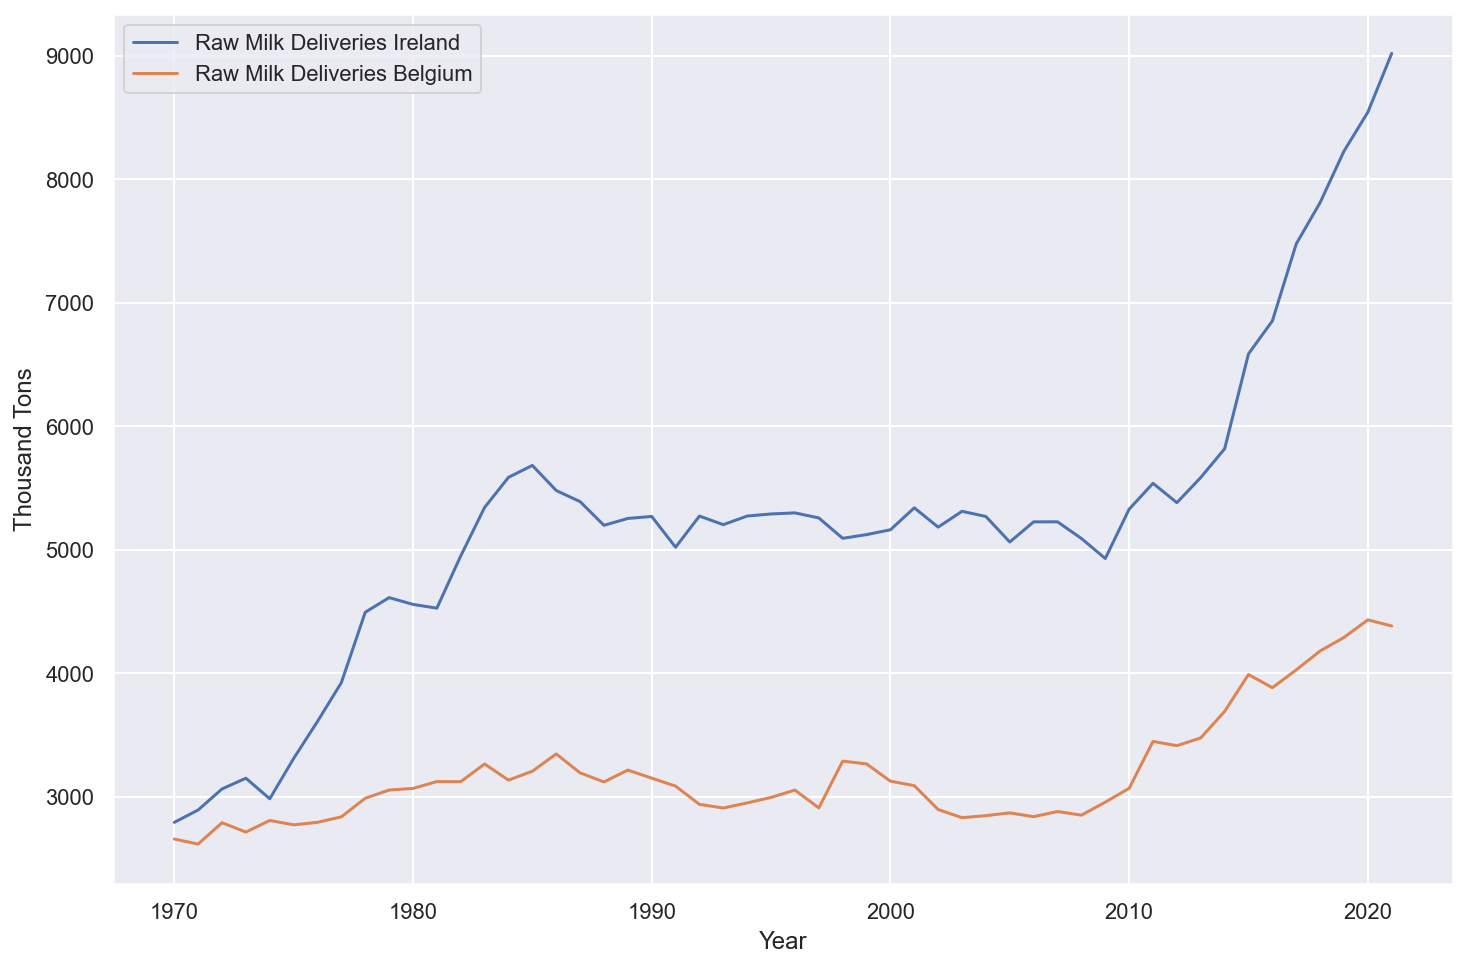

In [110]:
#Plot comparing Raw Milk deliveries Ireland vs Belgium

fig, ax = plt.subplots()
sns.set(font_scale=1)
sns.set(rc = {'figure.figsize':(10,8)})
ax= sns.lineplot(x='Year', y='Raw Milk Deliveries', label="Raw Milk Deliveries Ireland", data=df_MilkCollected_Annual_Ireland)
ax1 = sns.lineplot(x='Year', y='Raw Milk Deliveries', label="Raw Milk Deliveries Belgium", data=df_MilkCollected_Annual_Belgium)
ax.set( xlabel = "Year", ylabel = "Thousand Tons")

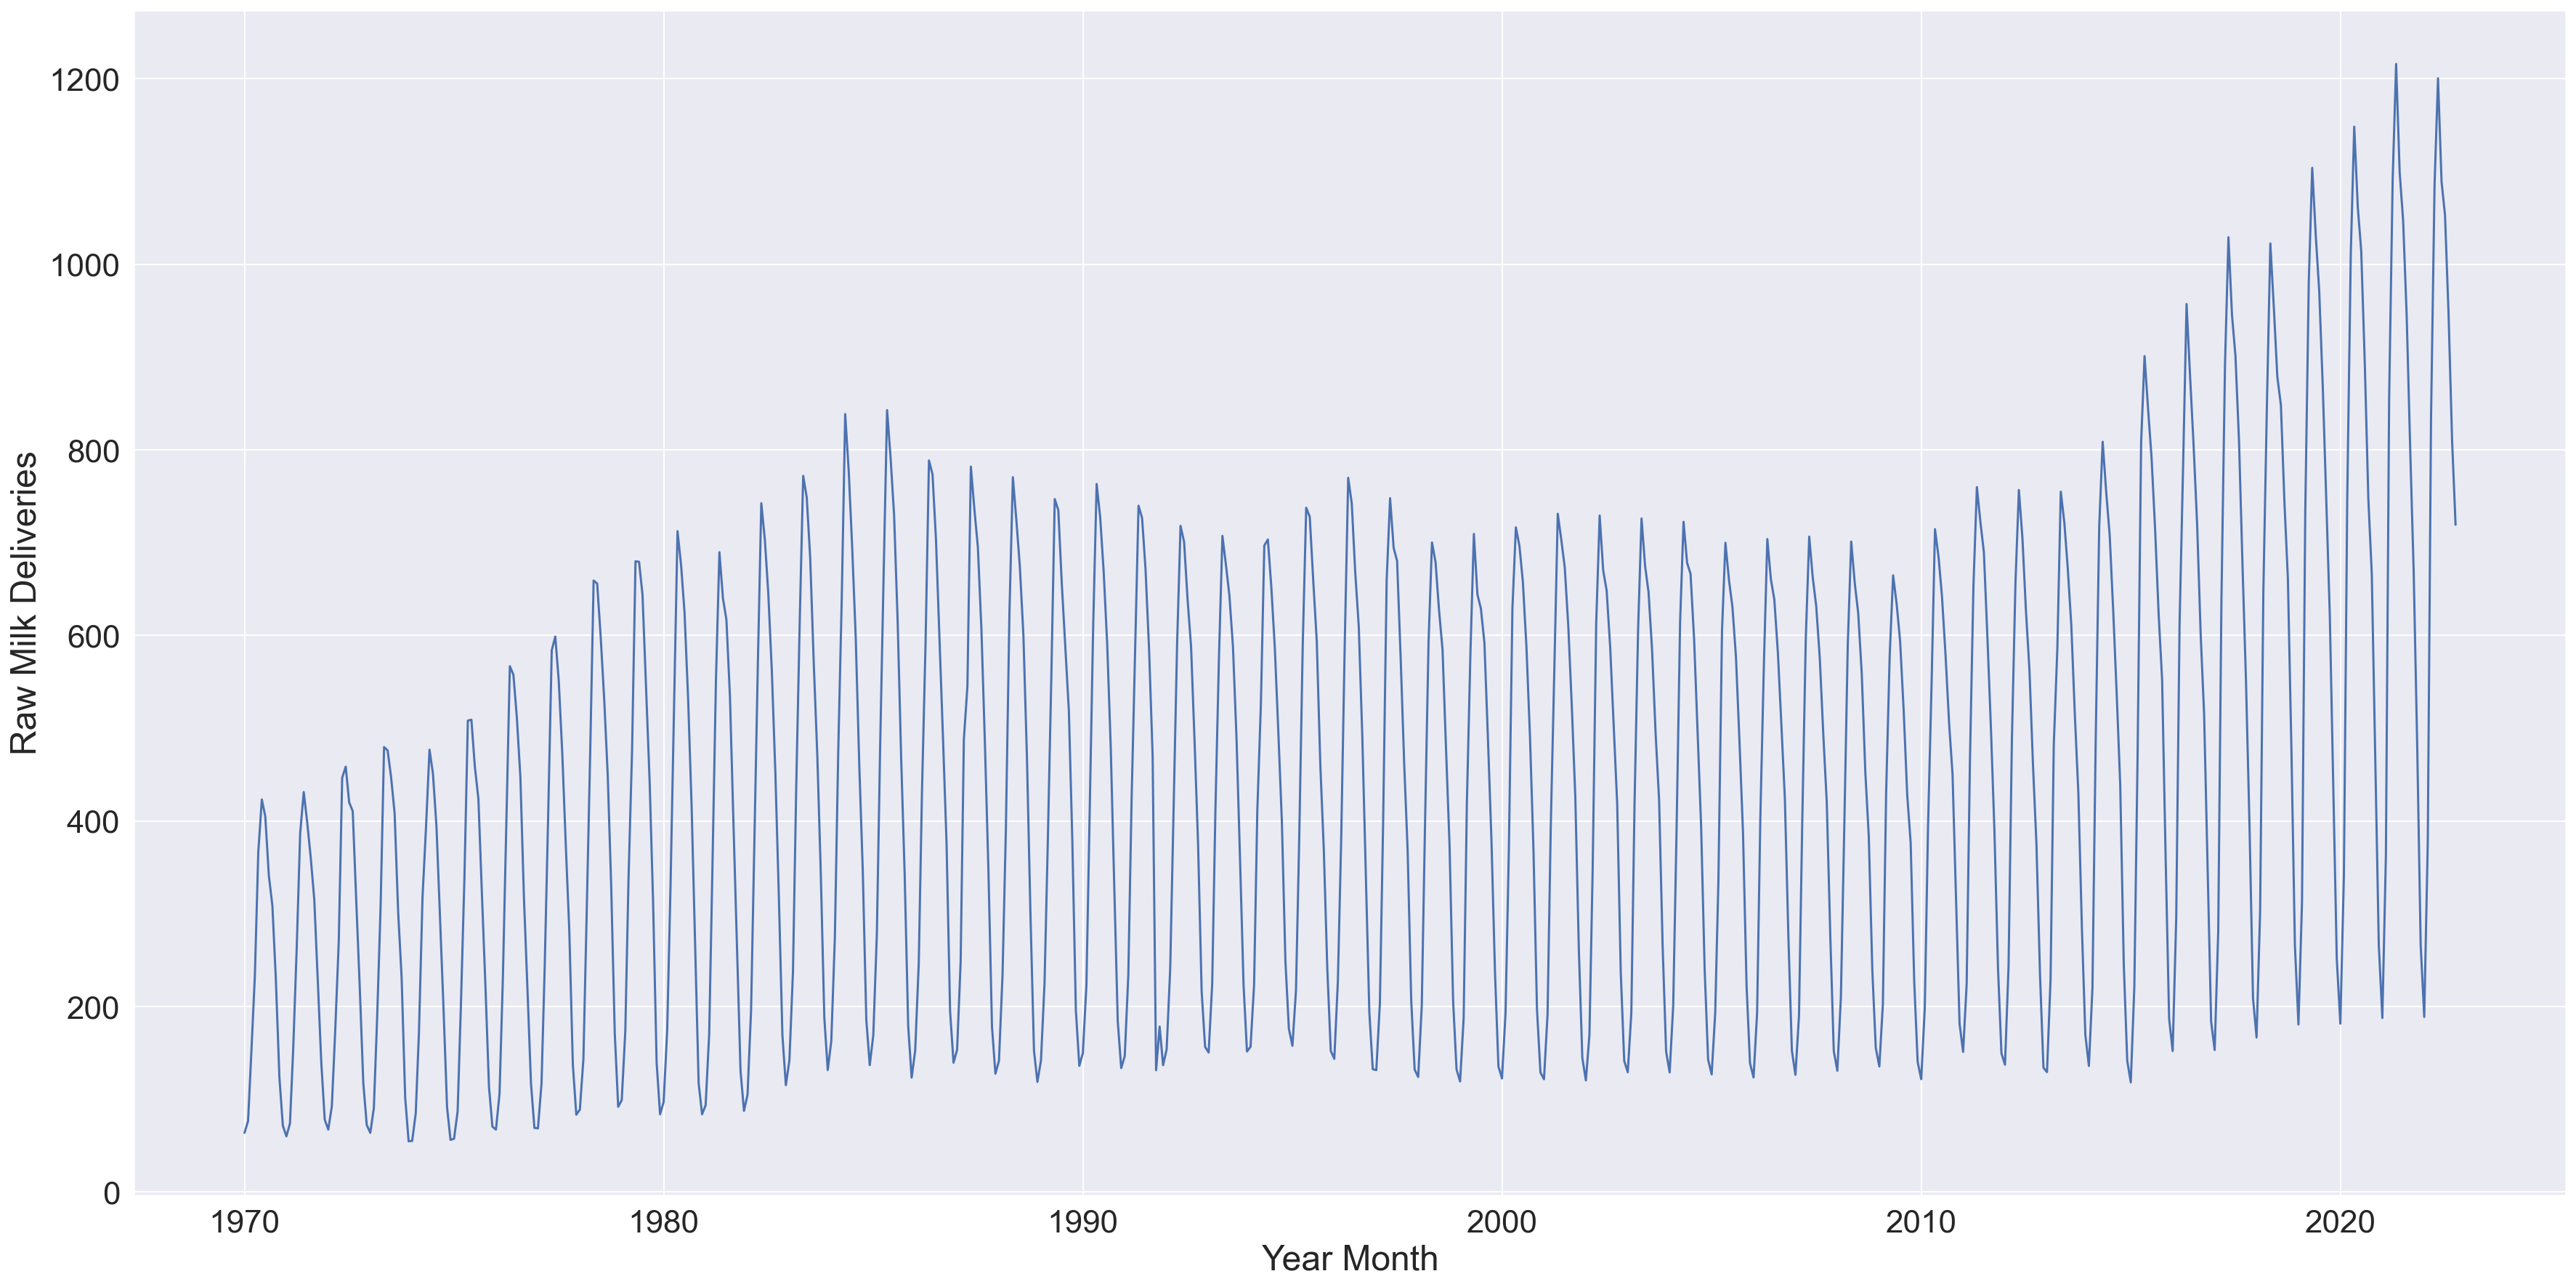

In [154]:
#Plot of Raw Milk collected monthly data Ireland

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Raw Milk Deliveries', data = df_MilkCollected_Monthly_Ireland)
plt.show()

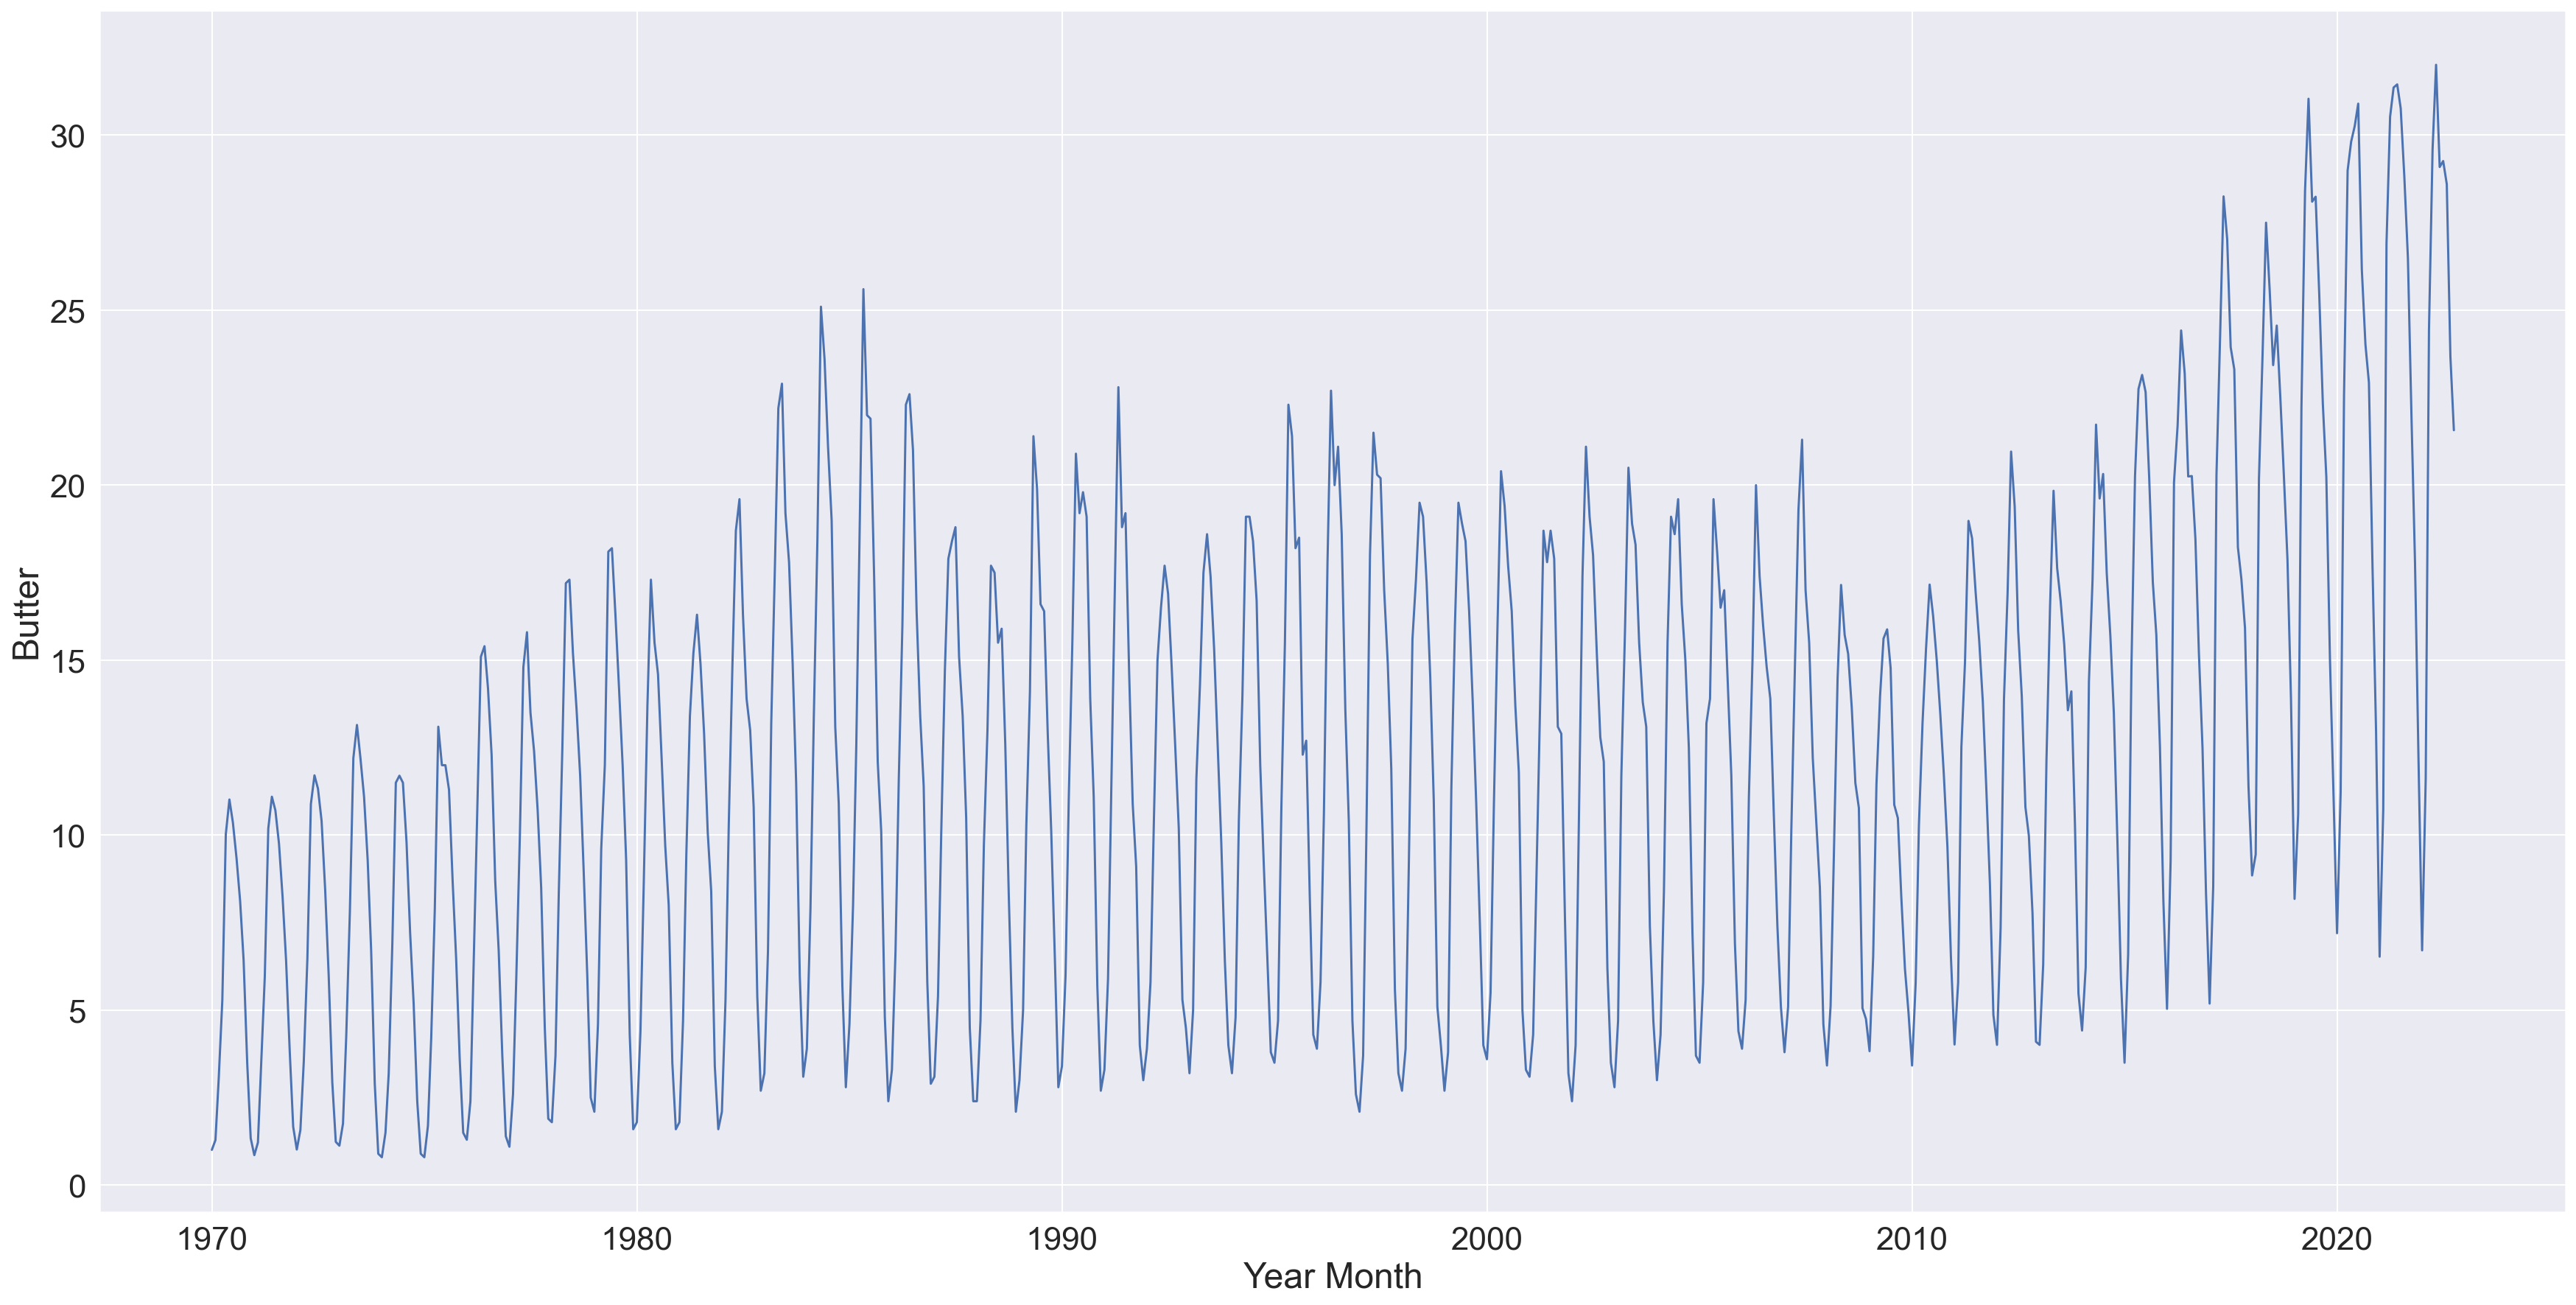

In [156]:
#Plot of Butter produced monthly data Ireland

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Butter', data = df_MilkCollected_Monthly_Ireland)
plt.show()

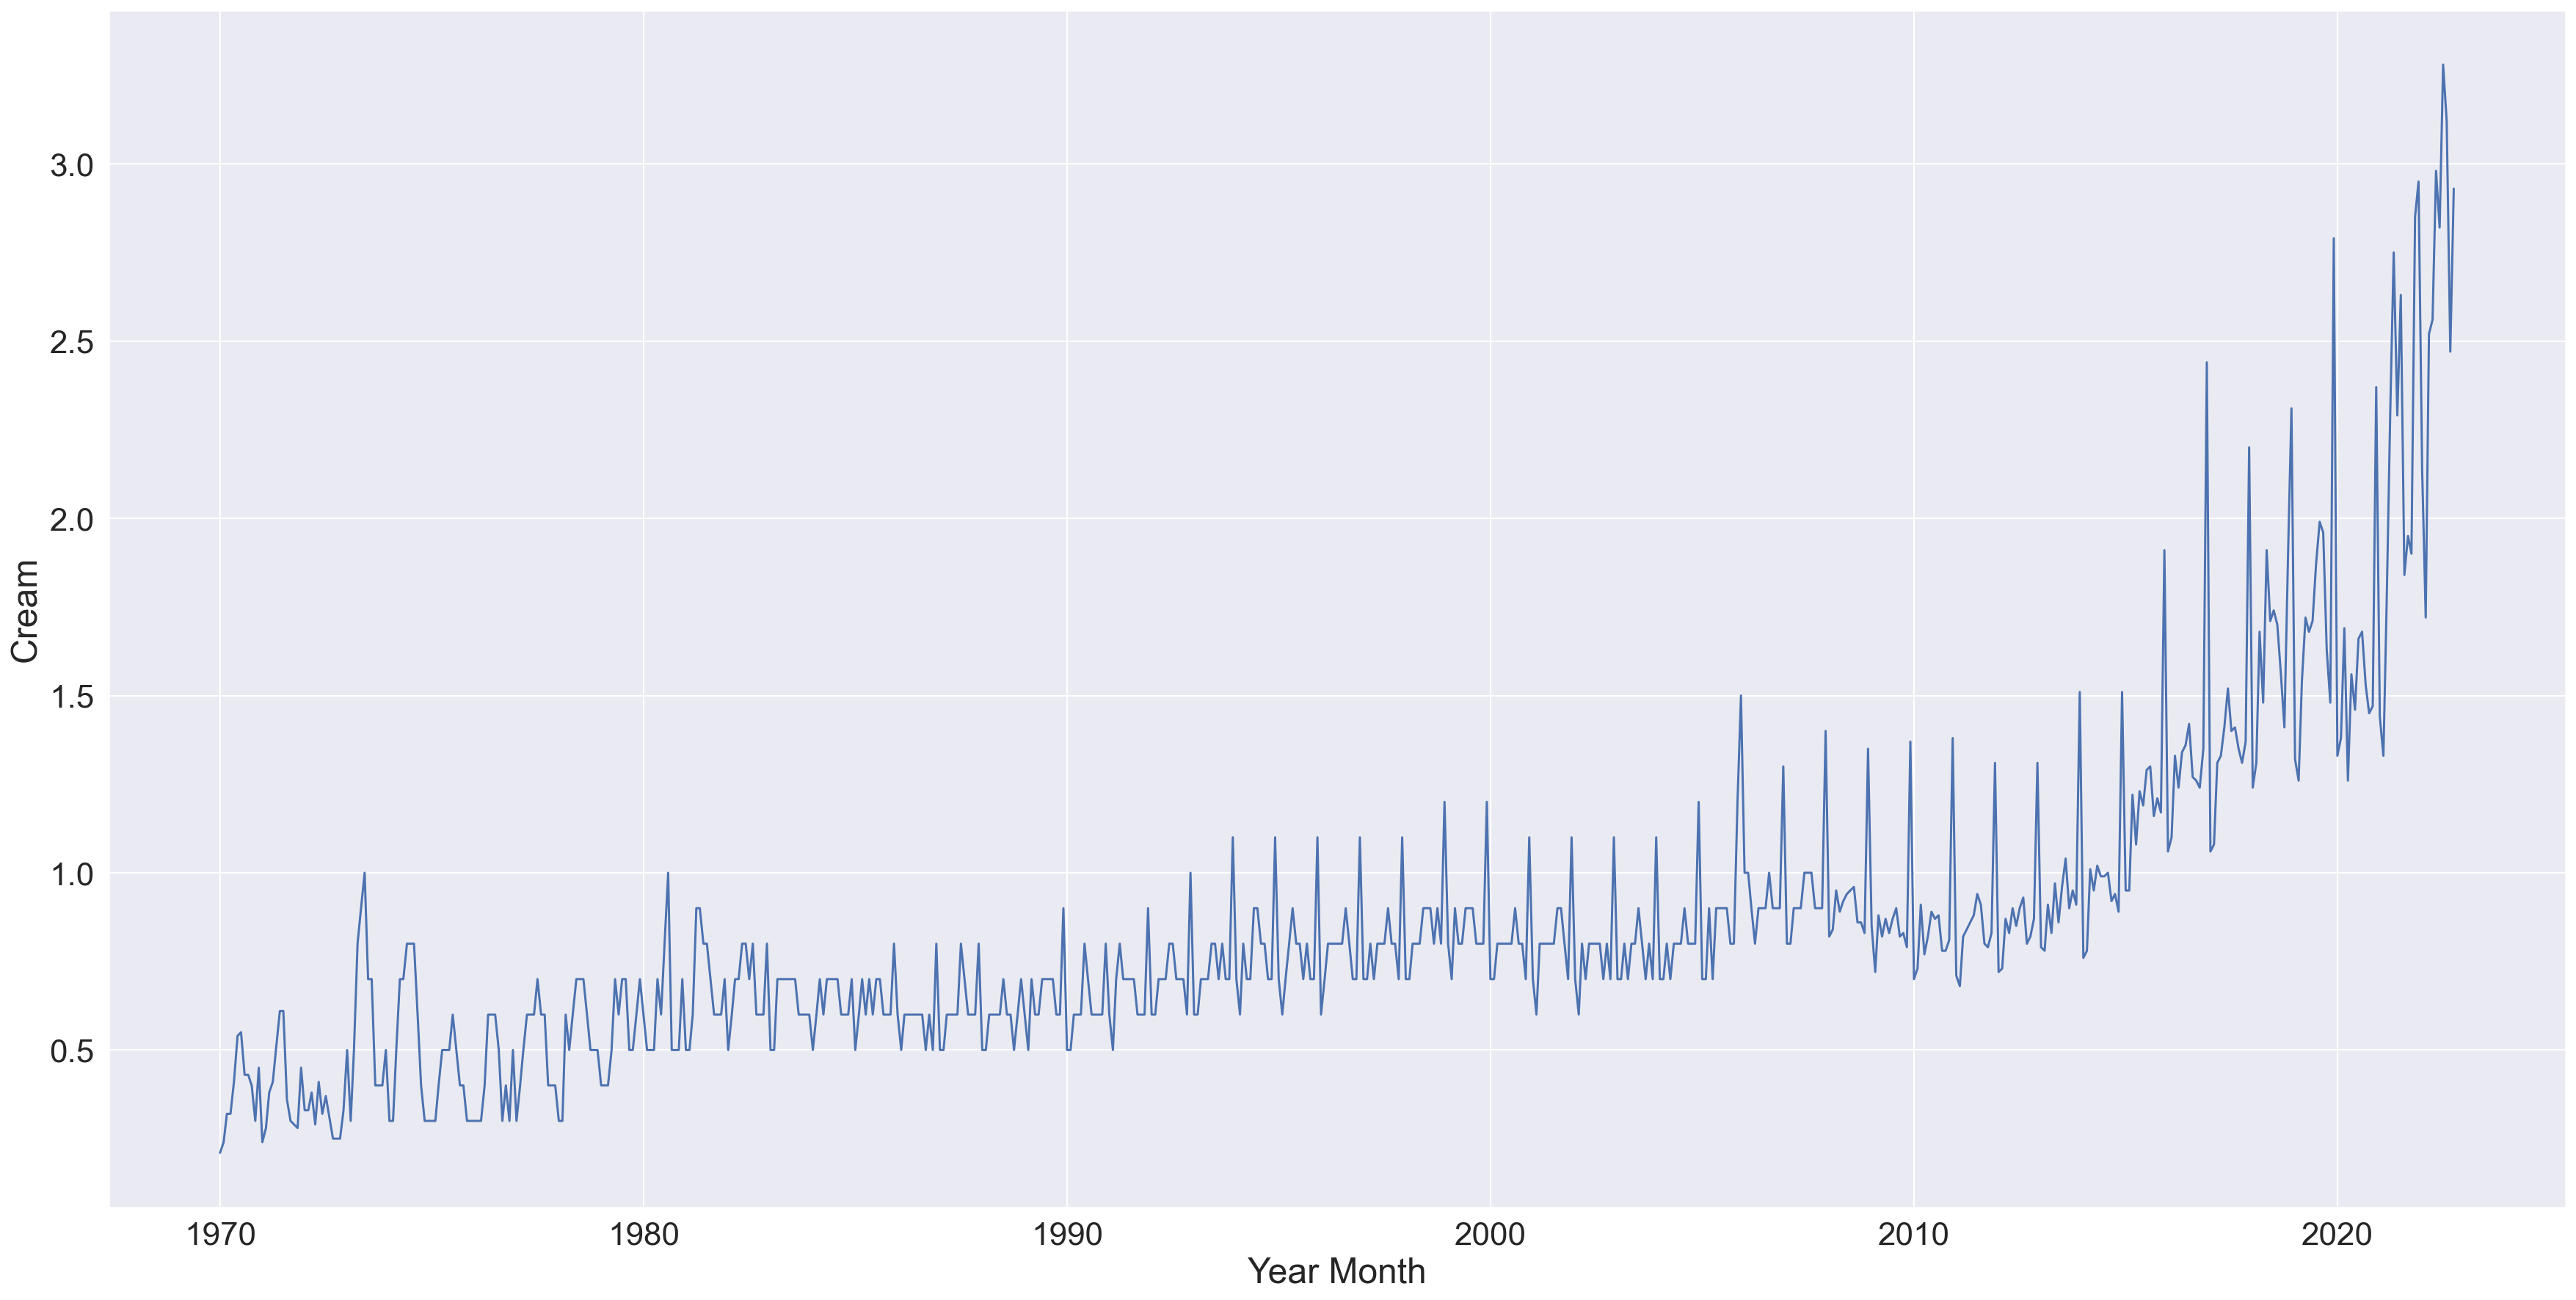

In [157]:
#Plot of Cream produced monthly data Ireland

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Cream', data = df_MilkCollected_Monthly_Ireland)
plt.show()

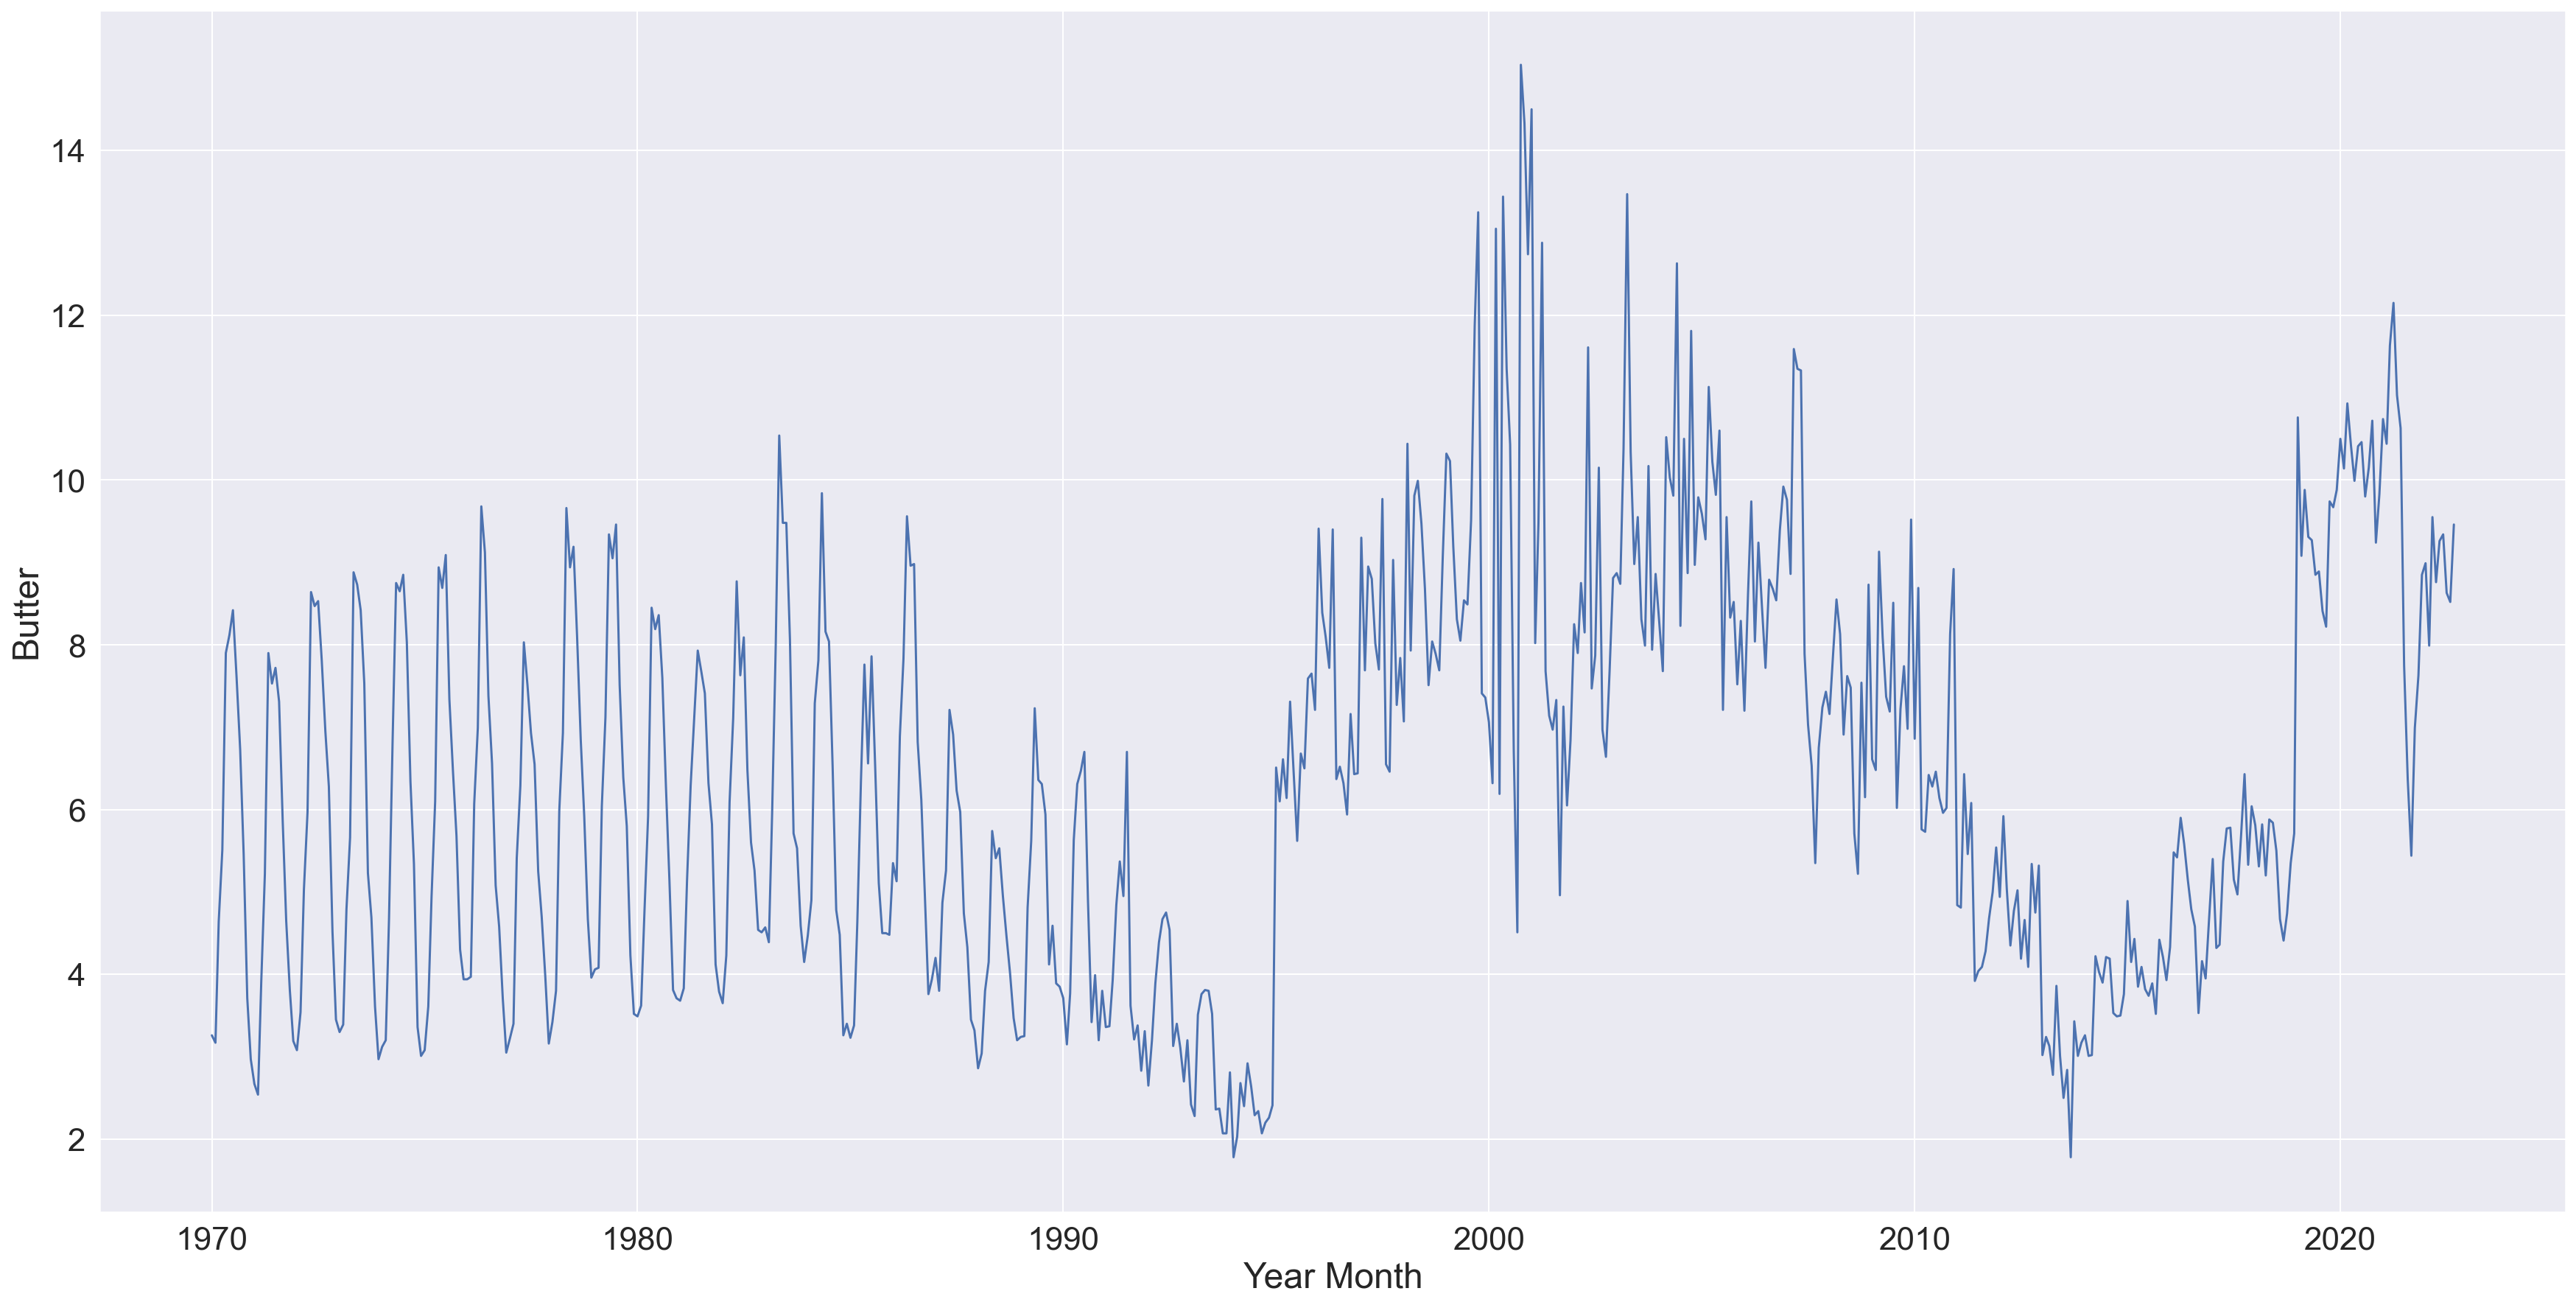

In [159]:
#Plot of Raw Milk collected monthly data Belgium

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Butter', data = df_MilkCollected_Monthly_Belgium)
plt.show()

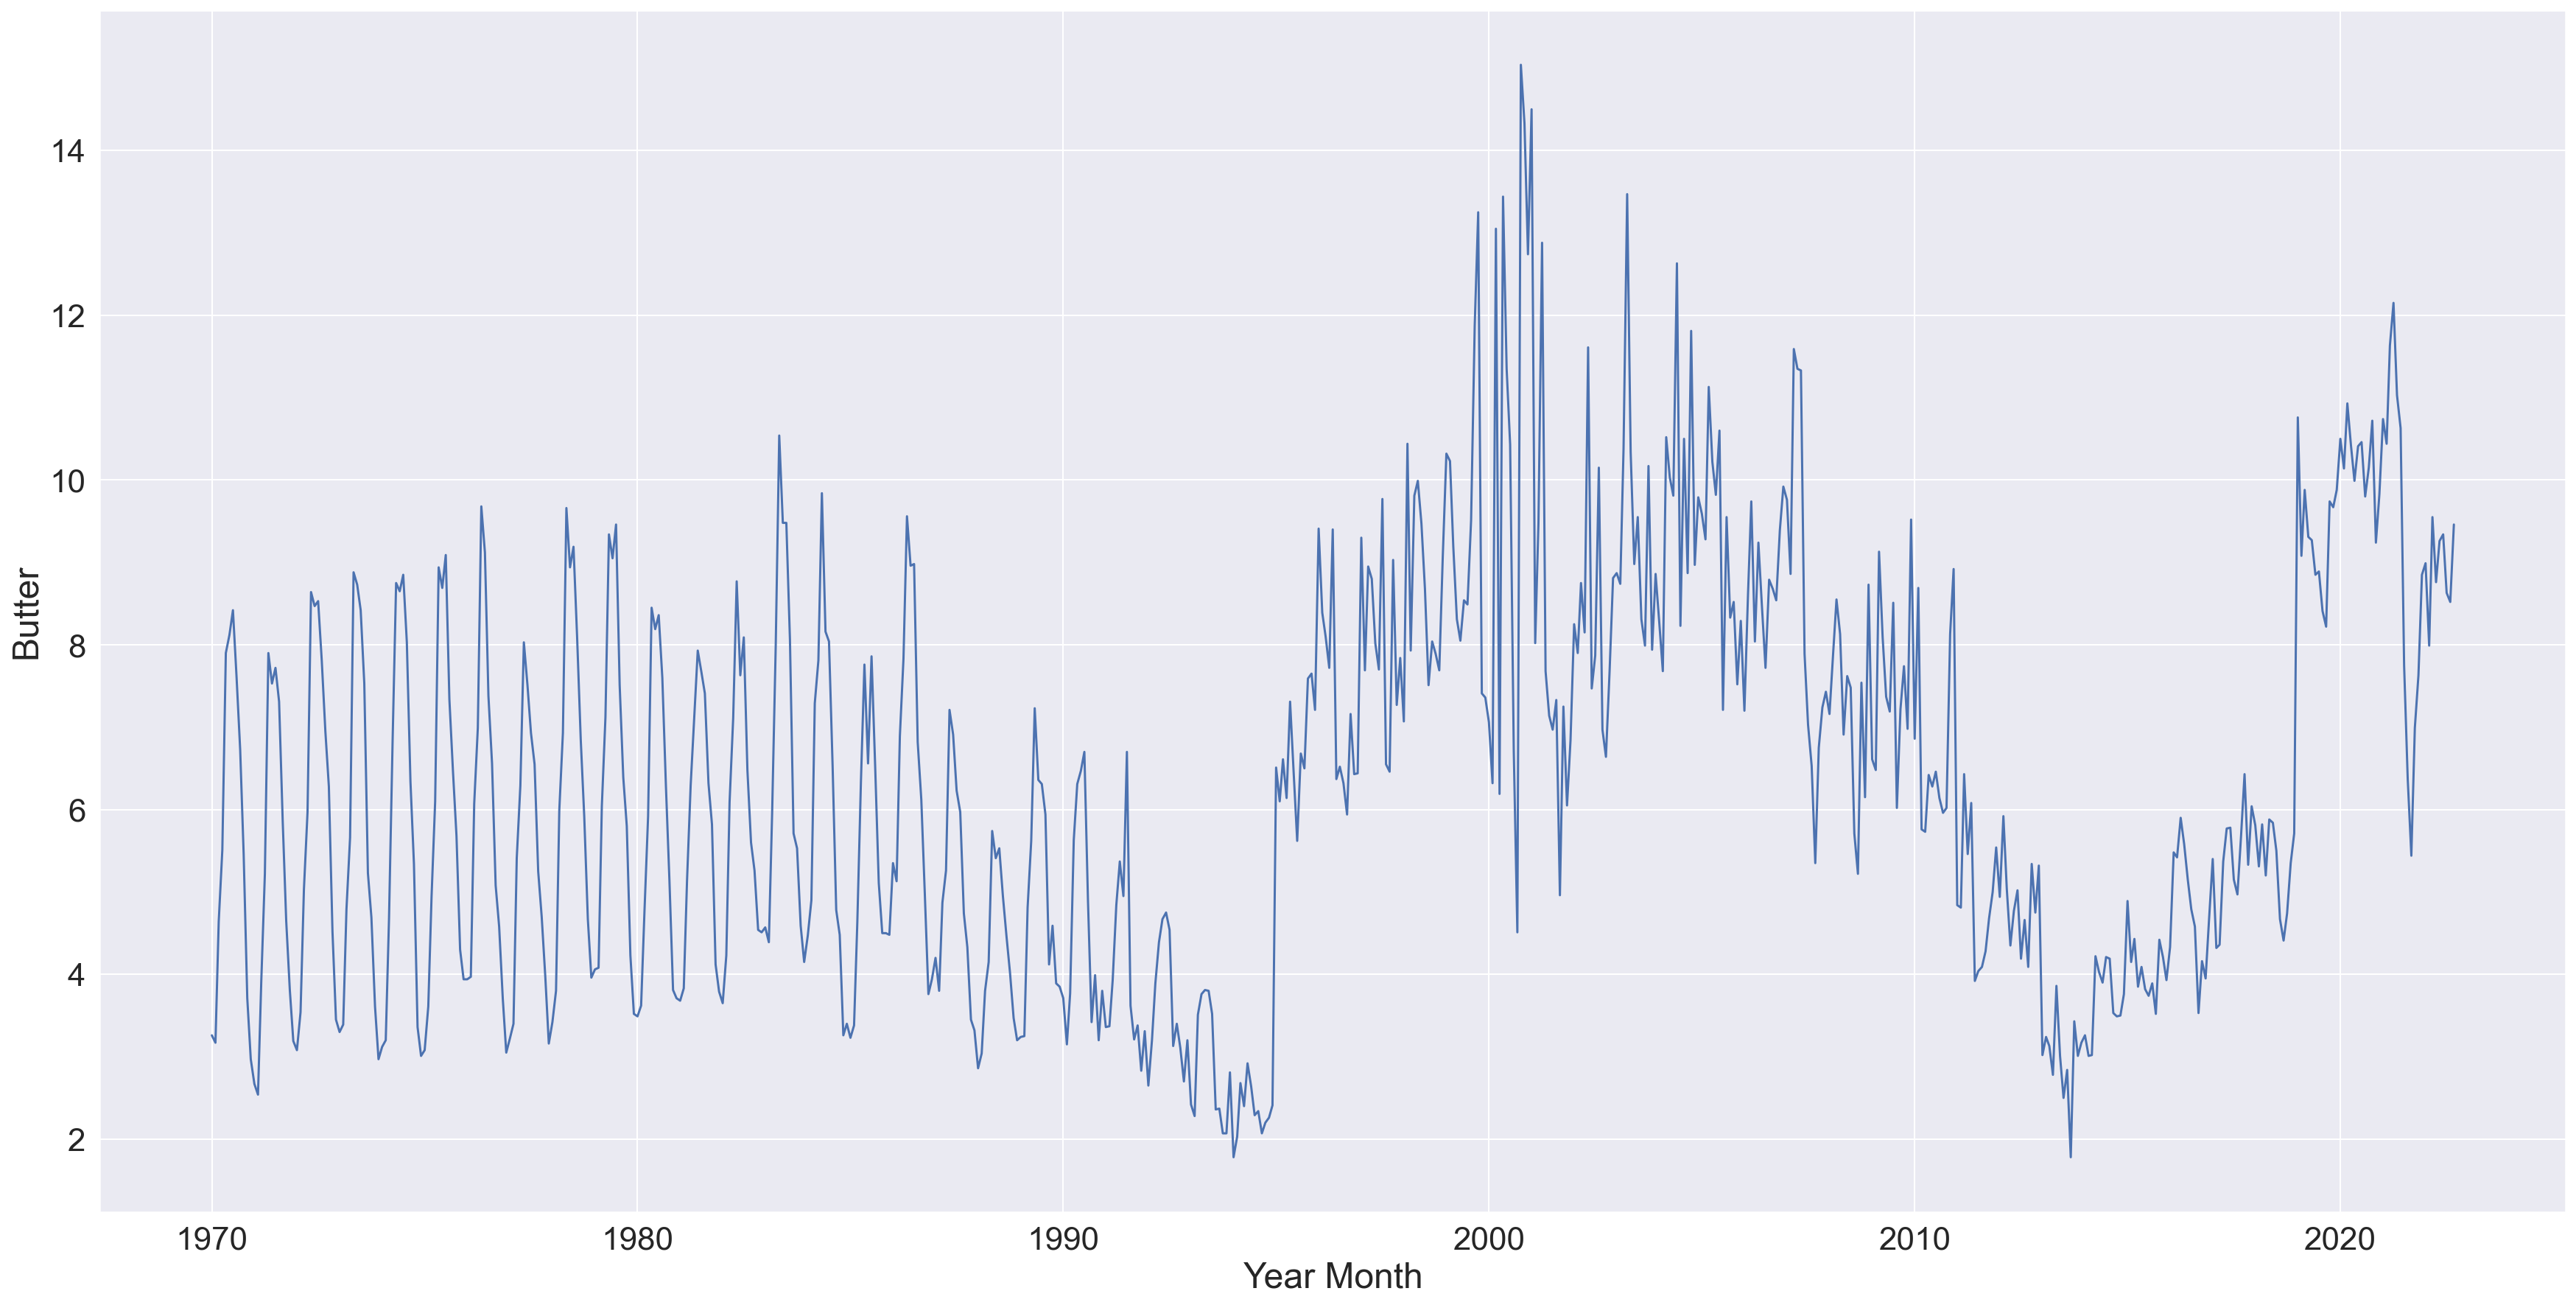

In [161]:
#Plot of Butter Produced monthly data Belgium

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Butter', data = df_MilkCollected_Monthly_Belgium)
plt.show()

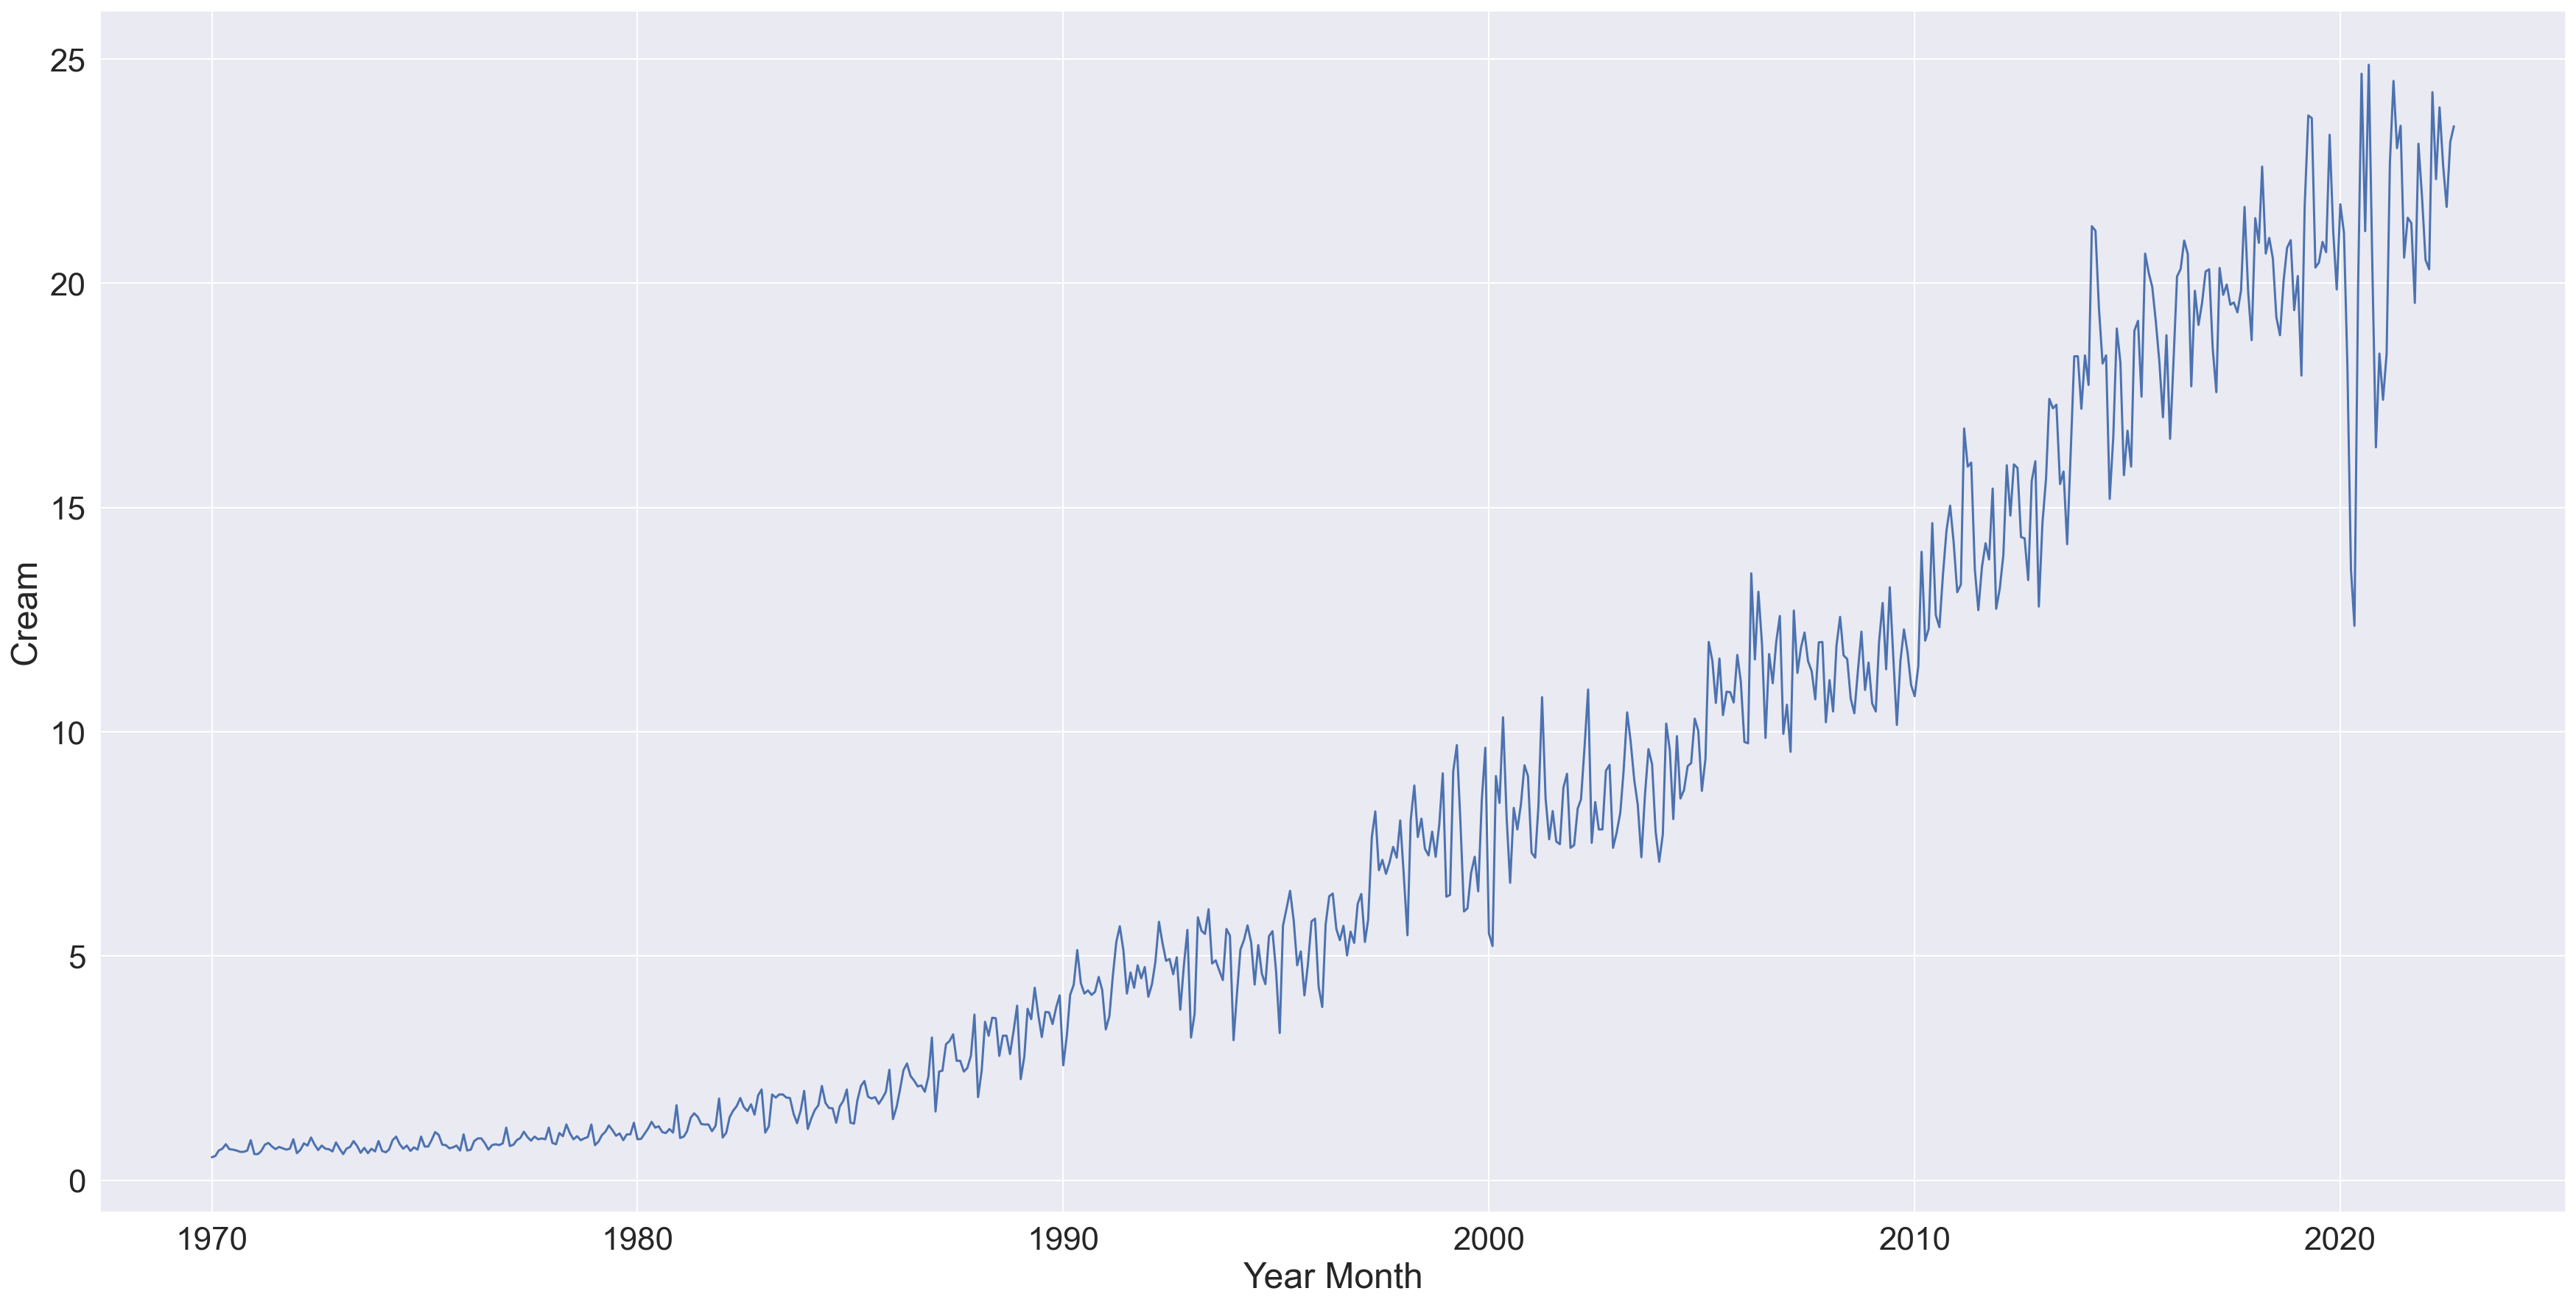

In [162]:
#Plot of Cream Produced monthly data Belgium

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Year Month', y = 'Cream', data = df_MilkCollected_Monthly_Belgium)
plt.show()

### Descriptive Statistics

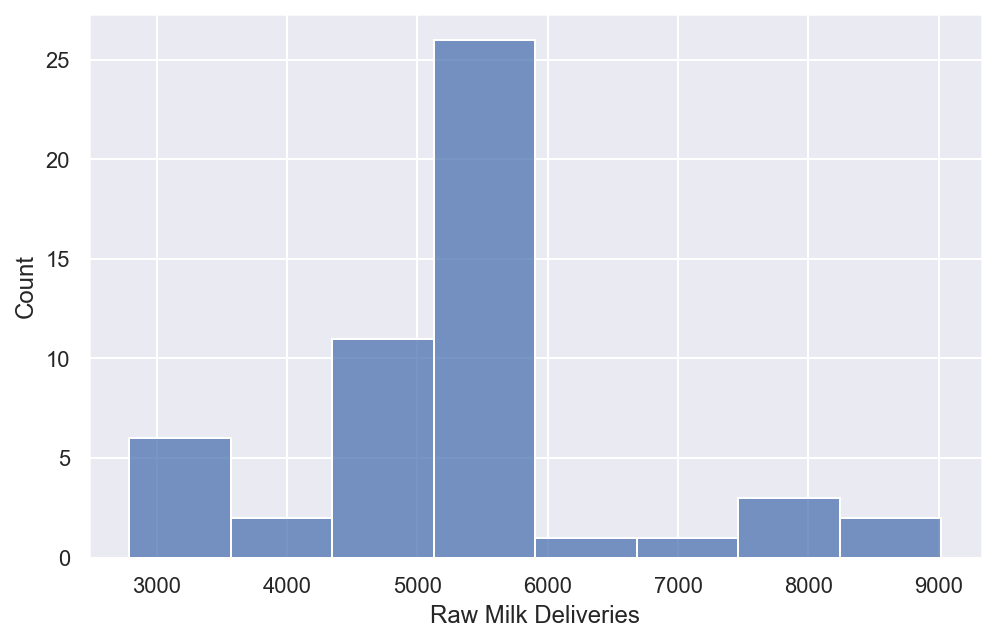

In [187]:
#Histogram of Raw Milk collected Ireland

sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)

ax = sns.histplot(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'],bins=8) 
plt.show()

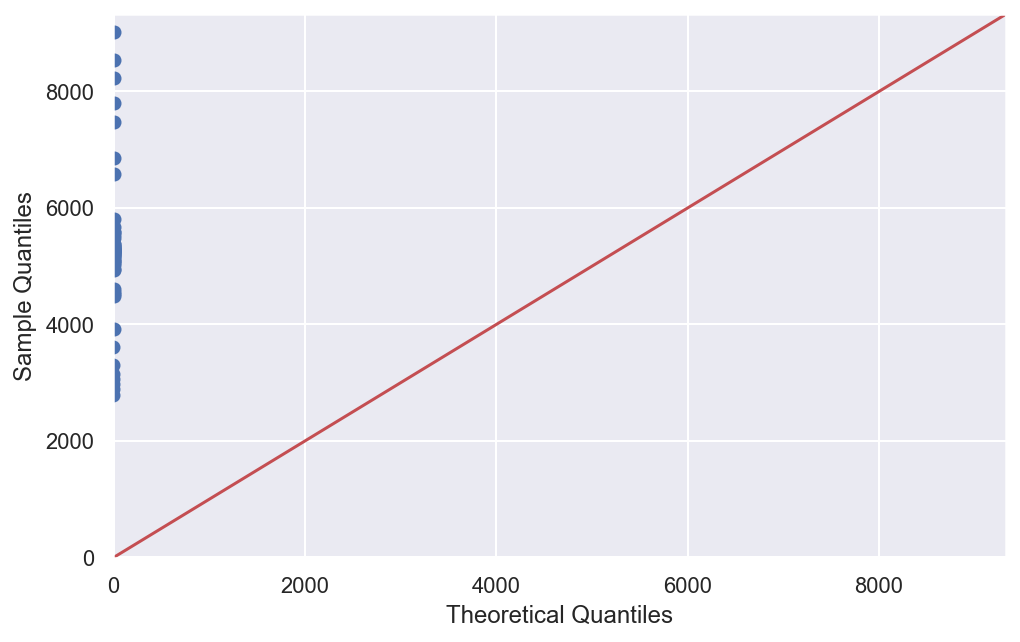

In [165]:
#Checking for normal distribution Q Q plot
fig = sm.qqplot(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'], line='45')

In [166]:
#Checking for normal distribution Shapiro Wilk test
shapiro(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'])

ShapiroResult(statistic=0.8696088790893555, pvalue=4.028079638374038e-05)

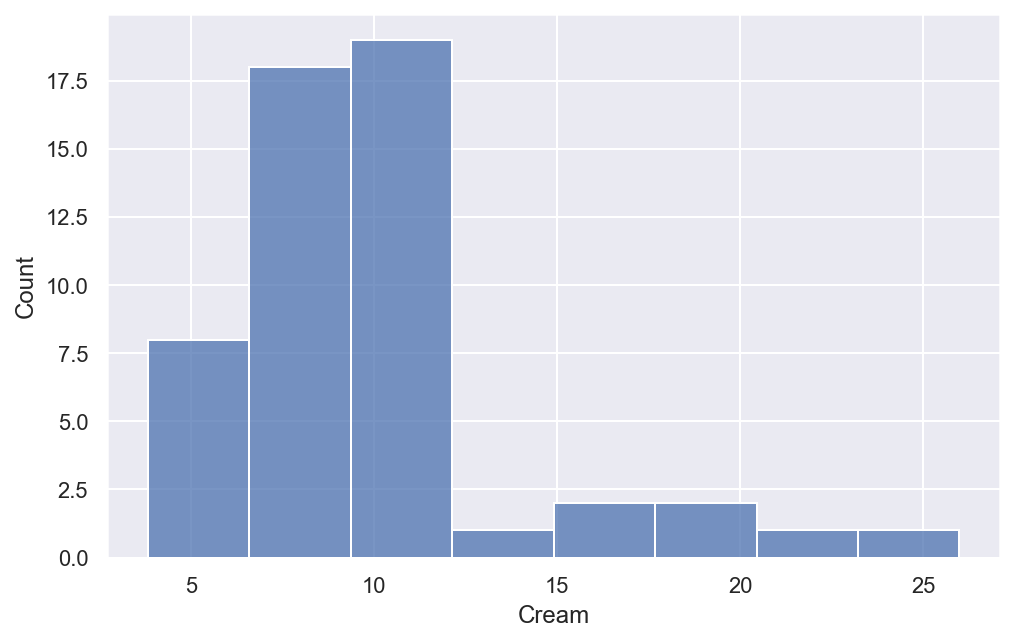

In [190]:
#Histogram of Annual Cream production Ireland

sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)

ax = sns.histplot(df_MilkCollected_Annual_Ireland['Cream'],bins=8) 
plt.show()

In [151]:
#Checking for normal distribution Shapiro Wilk test
shapiro(df_MilkCollected_Annual_Ireland['Cream'])

ShapiroResult(statistic=0.8378015160560608, pvalue=5.184936526347883e-06)

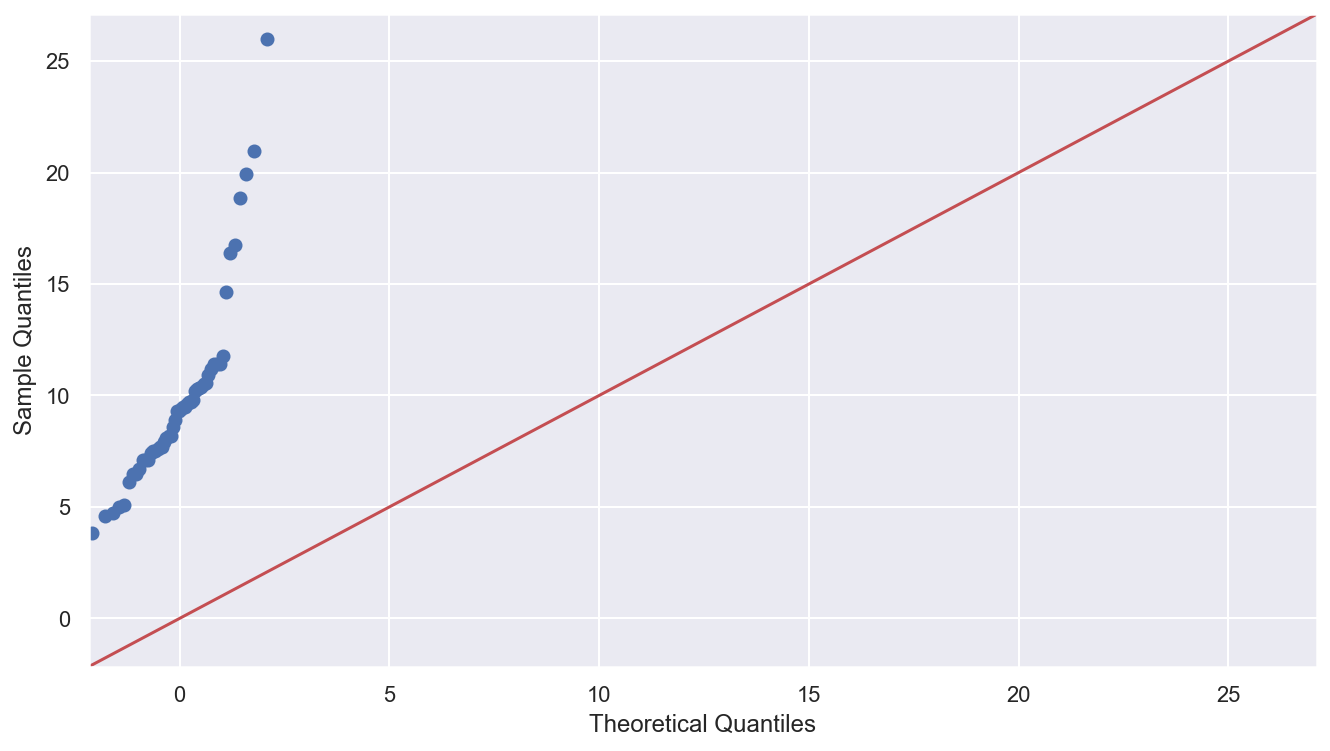

In [150]:
#Checking for normal distribution Q Q plot
fig = sm.qqplot(df_MilkCollected_Annual_Ireland['Cream'], line='45')

In [168]:
#Calculating Mean Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].mean()

5246.017307692308

In [169]:
#Calculating Median Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].median()

5254.15

In [174]:
#Calculating Mode Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].mode()

0     2790.65
1     2891.01
2     2981.80
3     3061.48
4     3148.39
5     3308.10
6     3608.40
7     3922.70
8     4492.30
9     4525.40
10    4556.10
11    4610.90
12    4927.53
13    4948.50
14    5018.90
15    5061.20
16    5089.94
17    5091.20
18    5121.00
19    5160.30
20    5181.60
21    5196.40
22    5201.70
23    5224.50
24    5224.70
25    5252.10
26    5256.20
27    5267.80
28    5268.30
29    5271.40
30    5271.60
31    5288.40
32    5297.10
33    5310.00
34    5327.02
35    5338.10
36    5341.10
37    5379.70
38    5388.20
39    5478.30
40    5536.68
41    5583.69
42    5585.00
43    5681.60
44    5816.23
45    6585.13
46    6851.63
47    7475.42
48    7810.24
49    8226.62
50    8542.27
51    9018.37
Name: Raw Milk Deliveries, dtype: float64

In [173]:
#Converting to int and then Calculating Mode Raw Milk Deliveries Ireland 
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].astype(int).mode()

0    5224
1    5271
Name: Raw Milk Deliveries, dtype: int32

In [177]:
#Calculating Standard Deviation for Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].std()

1307.875507565857

In [178]:
#Calculating Mean Butter produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].mean()

144.24038461538458

In [179]:
#Calculating Median Butter produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].median()

141.35

In [182]:
#Calculating Mode Butter produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].mode()

0      70.74
1      72.60
2      73.45
3      75.56
4      83.30
5      83.41
6      98.50
7     101.70
8     111.00
9     112.10
10    118.80
11    122.30
12    122.76
13    123.90
14    126.32
15    132.90
16    133.50
17    134.30
18    135.60
19    137.20
20    137.83
21    139.00
22    139.10
23    139.70
24    140.10
25    140.50
26    142.20
27    142.80
28    143.20
29    143.50
30    143.70
31    144.90
32    145.01
33    145.91
34    147.20
35    148.40
36    148.50
37    151.80
38    152.05
39    152.30
40    153.40
41    158.30
42    160.70
43    165.00
44    166.38
45    187.48
46    198.70
47    223.67
48    237.84
49    251.07
50    264.72
51    275.60
Name: Butter, dtype: float64

In [181]:
#Converting to int and then Calculating Mode Butter produced Ireland 
df_MilkCollected_Annual_Ireland['Butter'].astype(int).mode()

0    139
1    143
Name: Butter, dtype: int32

In [191]:
#Calculating Standard Deviarion Butter Produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].std()

44.60216058960524

In [195]:
#Calculating Skewness for Raw Milk Deliveries Ireland
skew(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'])

0.6749221815285303

In [196]:
#Calculating Skewness for Butter Produced Ireland
skew(df_MilkCollected_Annual_Ireland['Butter'])

1.0339301504225076

In [197]:
#Calculating Skewness for Cream Produced Ireland
skew(df_MilkCollected_Annual_Ireland['Cream'])

1.6946852927690197

## Machine Learning Section

In [116]:
# note add milk collected to LR

In [117]:
df_MilkCollected_Monthly_Ireland.head()

,Country,Geo,Code,Year,Raw Milk Deliveries,Milk,Cream,Butter,Month,Year Month
5251,Ireland,IE,IRL,1970,63.74,33.86,0.21,1.01,1,1970-01-01
5252,Ireland,IE,IRL,1970,76.61,31.77,0.24,1.29,2,1970-02-01
5253,Ireland,IE,IRL,1970,149.14,34.43,0.32,3.04,3,1970-03-01
5254,Ireland,IE,IRL,1970,232.22,33.74,0.32,5.28,4,1970-04-01
5255,Ireland,IE,IRL,1970,366.30,35.30,0.41,10.03,5,1970-05-01


In [118]:
dfTimeSeries = df_MilkCollected_Monthly_Ireland.copy()

#Drop unwanted columns
#linear regression will be on Hour and Day of Week
dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,3,4,5,6,9]], axis = 1,)
dfTimeSeries.head()

#Add dummy values for Hour to the machine learning dataframe
dfTimeSeries = pd.get_dummies(dfTimeSeries, prefix = ['Month'], columns = ['Month'], drop_first = True)

# X and y are the array variables that store the independent and dependent variables
y = dfTimeSeries['Butter']
X = dfTimeSeries.drop(columns=['Butter'])

# Split the dataset by using train_test_splitting to 25% and 75% for training and a seed of 42
xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(xTrain, yTrain)

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(lr.score(xTest, yTest)))


Training set score: 0.64
Test set score: 0.65


In [119]:
#Set the degree to use (Degree 2 = x**2)
poly_reg = PolynomialFeatures(degree = 3)

#Transform and fit to data
xPoly = poly_reg.fit_transform(X)

# Split the dataset by using train_test_splitting to 25% and 75% for training and a seed of 42
xTrain, xTest, yTrain, yTest = train_test_split(xPoly, y, random_state = 42)

lr = LinearRegression().fit(xTrain, yTrain)

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(xTrain, yTrain)))
print("Test set score: {:.2f}".format(lr.score(xTest, yTest)))

Training set score: 0.64
Test set score: 0.65


C:\Users\tonyw\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



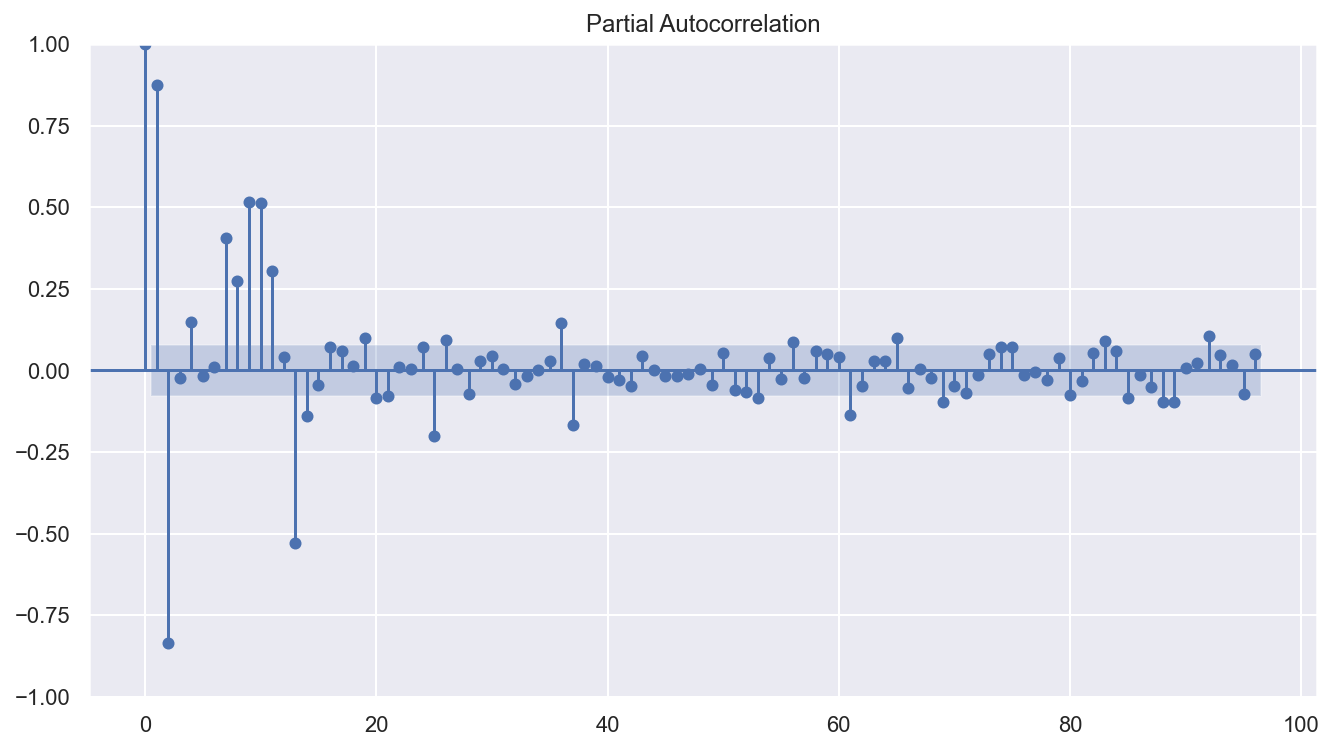

In [120]:
dfTimeSeries = df_MilkCollected_Monthly_Ireland.copy()
#Plot of Partial Autocorrelation for North Strand Rd S/B
sns.set(rc = {'figure.figsize':(11,6)})
sns.set(font_scale=1)
acf_plot = plot_pacf(dfTimeSeries['Raw Milk Deliveries'], lags =96)